In [2]:
import numpy as np
import pandas as pd
import keras

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from keras.layers import Input, Dense
from keras.models import Model

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc("font", size=12)
%matplotlib inline

import seaborn as sns
plot_dims = (25,15)
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':plot_dims})

In [123]:
df = pd.read_csv('dataset.csv')

<h2>EDA</h2>

In [124]:
df.head()

,Unnamed: 0,ID_NOTICE_CAN,YEAR,ID_TYPE,DT_DISPATCH,XSD_VERSION,CANCELLED,CORRECTIONS,CAE_NAME,CAE_NATIONALID,...,WIN_NAME,WIN_TOWN,WIN_POSTAL_CODE,WIN_COUNTRY_CODE,TITLE,NUMBER_OFFERS,AWARD_EST_VALUE_EURO,AWARD_VALUE_EURO,AWARD_VALUE_EURO_FIN_1,DT_AWARD
0,701785,201788281,2017,3,06-MAR-17,R209.S1,0,0,Brest métropole aménagement,49098247700039,...,Accès SARL---Atelier L2---EGIS — bâtiment Cent...,Évry-Grégy-sur-Yerre---Saint-Jacques-de-la-Lan...,77166---35136---35208,FR---FR---FR,Maîtrise d'œuvre pour la réalisation des cellu...,3.0,NaN,257855.00,257855.00,28-FEB-17
1,18948,2017462007,2017,3,16-NOV-17,R209.S2,0,0,Lancashire County Council,NaN,...,Townfield &amp; Coach House Care Ltd,Great Harwood,NaN,UK,Lot 1 Older People and People with Physical Di...,17.0,NaN,3331759.16,3331759.16,26-SEP-17
2,571268,2017469616,2017,3,21-NOV-17,R208.S3,0,0,Spitalul Clinic Judetean de Urgenta Sf. Spirid...,NaN,...,GENODYNAMIC SRL,Corbeanca,077066,RO,NaN,6.0,NaN,4489.58,4489.58,10-NOV-17
3,372379,2017518456,2017,3,21-DEC-17,R209.S2,0,0,CEA/Grenoble,NaN,...,MEMC Electronic Materials SpA,Novara,NaN,IT,Fourniture de plaques de silicium de 200 mm: P...,1.0,6000000.0,1.00,1.00,05-DEC-17
4,700364,2017313213,2017,3,07-AUG-17,R209.S2,0,0,Aabenraa Kommune,NaN,...,NaN,NaN,NaN,NaN,ÅB105,NaN,NaN,NaN,0.00,NaN


In [125]:
df.describe()

,Unnamed: 0,ID_NOTICE_CAN,YEAR,ID_TYPE,CANCELLED,CORRECTIONS,VALUE_EURO,VALUE_EURO_FIN_1,VALUE_EURO_FIN_2,ID_AWARD,NUMBER_OFFERS,AWARD_EST_VALUE_EURO,AWARD_VALUE_EURO,AWARD_VALUE_EURO_FIN_1
count,30000.000000,3.000000e+04,30000.0,30000.000000,30000.0000,30000.000000,2.671600e+04,2.723500e+04,2.723500e+04,2.768800e+04,23768.000000,1.033400e+04,2.270200e+04,2.602100e+04
mean,353402.061300,1.633957e+09,2017.0,3.533767,0.0001,0.004833,1.804358e+07,1.222942e+09,1.222942e+09,8.112430e+06,6.618857,4.808186e+06,3.912539e+06,3.538312e+06
std,204868.687869,7.471353e+08,0.0,2.477956,0.0100,0.079646,6.761886e+08,1.819007e+11,1.819007e+11,1.937242e+05,27.277382,1.028249e+08,1.029622e+08,9.665994e+07
min,19.000000,2.017124e+06,2017.0,3.000000,0.0000,0.000000,1.000000e-02,1.000000e-02,1.000000e-02,7.775522e+06,0.000000,1.000000e-02,1.000000e-02,0.000000e+00
25%,176180.000000,2.017125e+09,2017.0,3.000000,0.0000,0.000000,1.803505e+05,1.257642e+05,1.257642e+05,7.945576e+06,1.000000,4.408960e+03,2.937537e+03,7.104900e+02
50%,354003.500000,2.017264e+09,2017.0,3.000000,0.0000,0.000000,5.206623e+05,4.305427e+05,4.305427e+05,8.112758e+06,3.000000,3.750935e+04,3.310152e+04,1.900801e+04
75%,529952.750000,2.017398e+09,2017.0,3.000000,0.0000,0.000000,2.000000e+06,1.616313e+06,1.616313e+06,8.280660e+06,5.000000,2.784213e+05,2.400727e+05,1.950700e+05
max,708838.000000,2.017529e+09,2017.0,25.000000,1.0000,3.000000,1.000000e+11,3.000000e+13,3.000000e+13,8.447092e+06,999.000000,8.542002e+09,1.000000e+10,1.000000e+10


In [126]:
df.isnull().sum()

Unnamed: 0                    0
ID_NOTICE_CAN                 0
YEAR                          0
ID_TYPE                       0
DT_DISPATCH                   0
XSD_VERSION                   0
CANCELLED                     0
CORRECTIONS                   0
CAE_NAME                      0
CAE_NATIONALID            19033
CAE_TOWN                      1
CAE_POSTAL_CODE             519
ISO_COUNTRY_CODE              0
CAE_TYPE                      0
MAIN_ACTIVITY                 0
TYPE_OF_CONTRACT              0
VALUE_EURO                 3284
VALUE_EURO_FIN_1           2765
VALUE_EURO_FIN_2           2765
TOP_TYPE                     36
ID_AWARD                   2312
WIN_NAME                   4975
WIN_TOWN                   5990
WIN_POSTAL_CODE            9682
WIN_COUNTRY_CODE           5728
TITLE                      9014
NUMBER_OFFERS              6232
AWARD_EST_VALUE_EURO      19666
AWARD_VALUE_EURO           7298
AWARD_VALUE_EURO_FIN_1     3979
DT_AWARD                   5461
dtype: i

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
Unnamed: 0                30000 non-null int64
ID_NOTICE_CAN             30000 non-null int64
YEAR                      30000 non-null int64
ID_TYPE                   30000 non-null int64
DT_DISPATCH               30000 non-null object
XSD_VERSION               30000 non-null object
CANCELLED                 30000 non-null int64
CORRECTIONS               30000 non-null int64
CAE_NAME                  30000 non-null object
CAE_NATIONALID            10967 non-null object
CAE_TOWN                  29999 non-null object
CAE_POSTAL_CODE           29481 non-null object
ISO_COUNTRY_CODE          30000 non-null object
CAE_TYPE                  30000 non-null object
MAIN_ACTIVITY             30000 non-null object
TYPE_OF_CONTRACT          30000 non-null object
VALUE_EURO                26716 non-null float64
VALUE_EURO_FIN_1          27235 non-null float64
VALUE_EURO_FIN_2          27235

In [128]:
df[['YEAR', 'DT_DISPATCH', 'XSD_VERSION', 'CAE_NAME', 'CAE_NATIONALID', 'CAE_TOWN', 'CAE_POSTAL_CODE', 'ISO_COUNTRY_CODE', 'CAE_TYPE', 'MAIN_ACTIVITY', 'TYPE_OF_CONTRACT', 'TOP_TYPE', 'WIN_NAME', 'WIN_TOWN', 'WIN_POSTAL_CODE', 'WIN_COUNTRY_CODE', 'TITLE', 'DT_AWARD']].head()

,YEAR,DT_DISPATCH,XSD_VERSION,CAE_NAME,CAE_NATIONALID,CAE_TOWN,CAE_POSTAL_CODE,ISO_COUNTRY_CODE,CAE_TYPE,MAIN_ACTIVITY,TYPE_OF_CONTRACT,TOP_TYPE,WIN_NAME,WIN_TOWN,WIN_POSTAL_CODE,WIN_COUNTRY_CODE,TITLE,DT_AWARD
0,2017,06-MAR-17,R209.S1,Brest métropole aménagement,49098247700039,Brest Cedex 2,29238,FR,8,Other,S,NIC,Accès SARL---Atelier L2---EGIS — bâtiment Cent...,Évry-Grégy-sur-Yerre---Saint-Jacques-de-la-Lan...,77166---35136---35208,FR---FR---FR,Maîtrise d'œuvre pour la réalisation des cellu...,28-FEB-17
1,2017,16-NOV-17,R209.S2,Lancashire County Council,NaN,Preston,NaN,UK,3,Other,S,OPE,Townfield &amp; Coach House Care Ltd,Great Harwood,NaN,UK,Lot 1 Older People and People with Physical Di...,26-SEP-17
2,2017,21-NOV-17,R208.S3,Spitalul Clinic Judetean de Urgenta Sf. Spirid...,NaN,Iasi,700111,RO,6,Health,U,OPE,GENODYNAMIC SRL,Corbeanca,077066,RO,NaN,10-NOV-17
3,2017,21-DEC-17,R209.S2,CEA/Grenoble,NaN,Grenoble Cedex 9,38054,FR,6,Other,U,OPE,MEMC Electronic Materials SpA,Novara,NaN,IT,Fourniture de plaques de silicium de 200 mm: P...,05-DEC-17
4,2017,07-AUG-17,R209.S2,Aabenraa Kommune,NaN,Aabenraa,NaN,DK,3,General public\services,S,OPE,NaN,NaN,NaN,NaN,ÅB105,NaN


In [129]:
def percentager(df, column, binned=False):
    
    if binned == False:
        totals = df.groupby(column)[column].count()
        df_pct = pd.DataFrame(totals, columns = [column])
    else:
        df_pct = df
        
    df_pct.insert(loc=1,
                       column = 'Percentage',
                       value = (((df_pct[column]/df_pct[column].sum())*100).round(2)))
    
    df_pct = df_pct.sort_values(by = column, ascending=False)
    
    df_pct.rename(columns={column:'Total'}, inplace=True)
    
    return df_pct

Text(0.5,1,'ISO_COUNTRY_CODE')

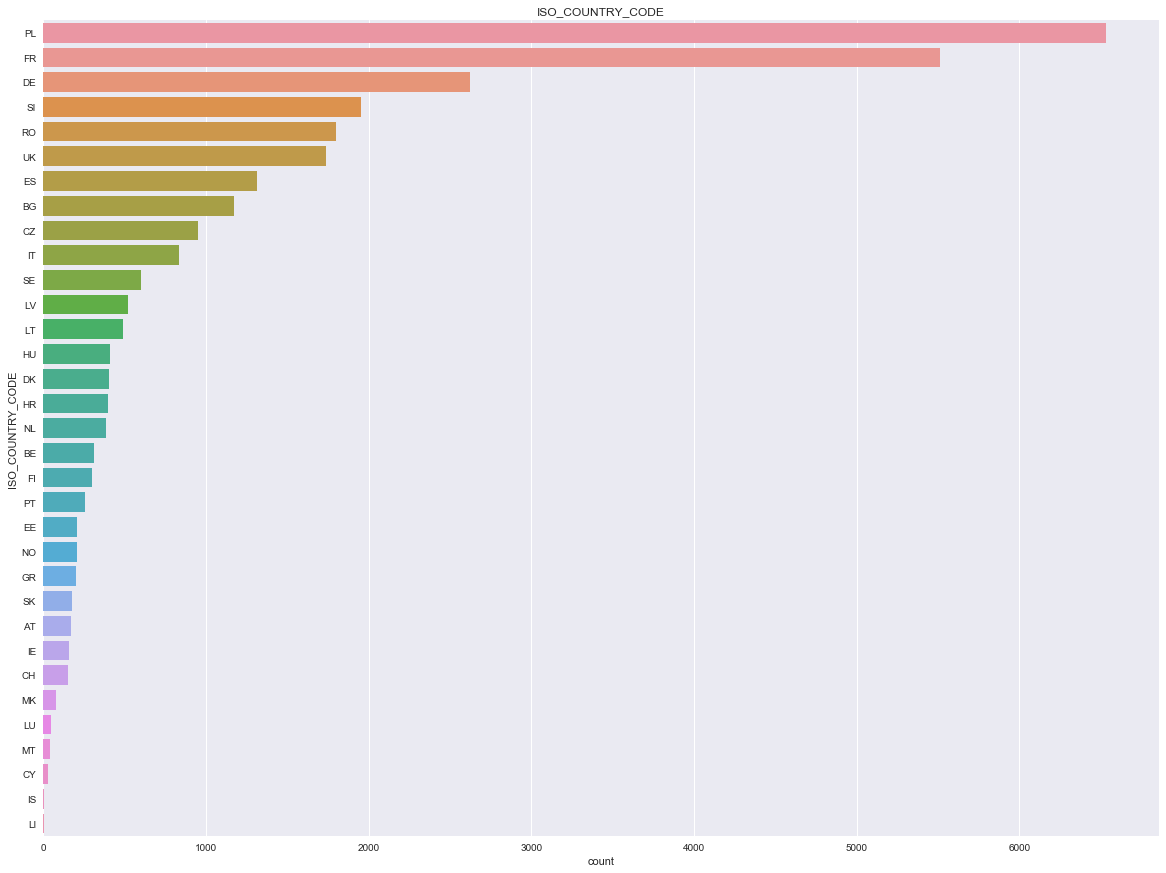

In [130]:
sns.countplot(y= df['ISO_COUNTRY_CODE'], 
              order = df['ISO_COUNTRY_CODE'].value_counts().index).set_title('ISO_COUNTRY_CODE')

In [131]:
df_iso = percentager(df, 'ISO_COUNTRY_CODE')
df_iso.head(10)

/Users/Pablo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: 'ISO_COUNTRY_CODE' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  del sys.path[0]


,Total,Percentage
ISO_COUNTRY_CODE,,
PL,6534,21.78
FR,5514,18.38
DE,2622,8.74
SI,1953,6.51
RO,1803,6.01
UK,1736,5.79
ES,1312,4.37
BG,1172,3.91
CZ,954,3.18


Poland was the country generating more contracts for the considered period, with 21.78% of the total.

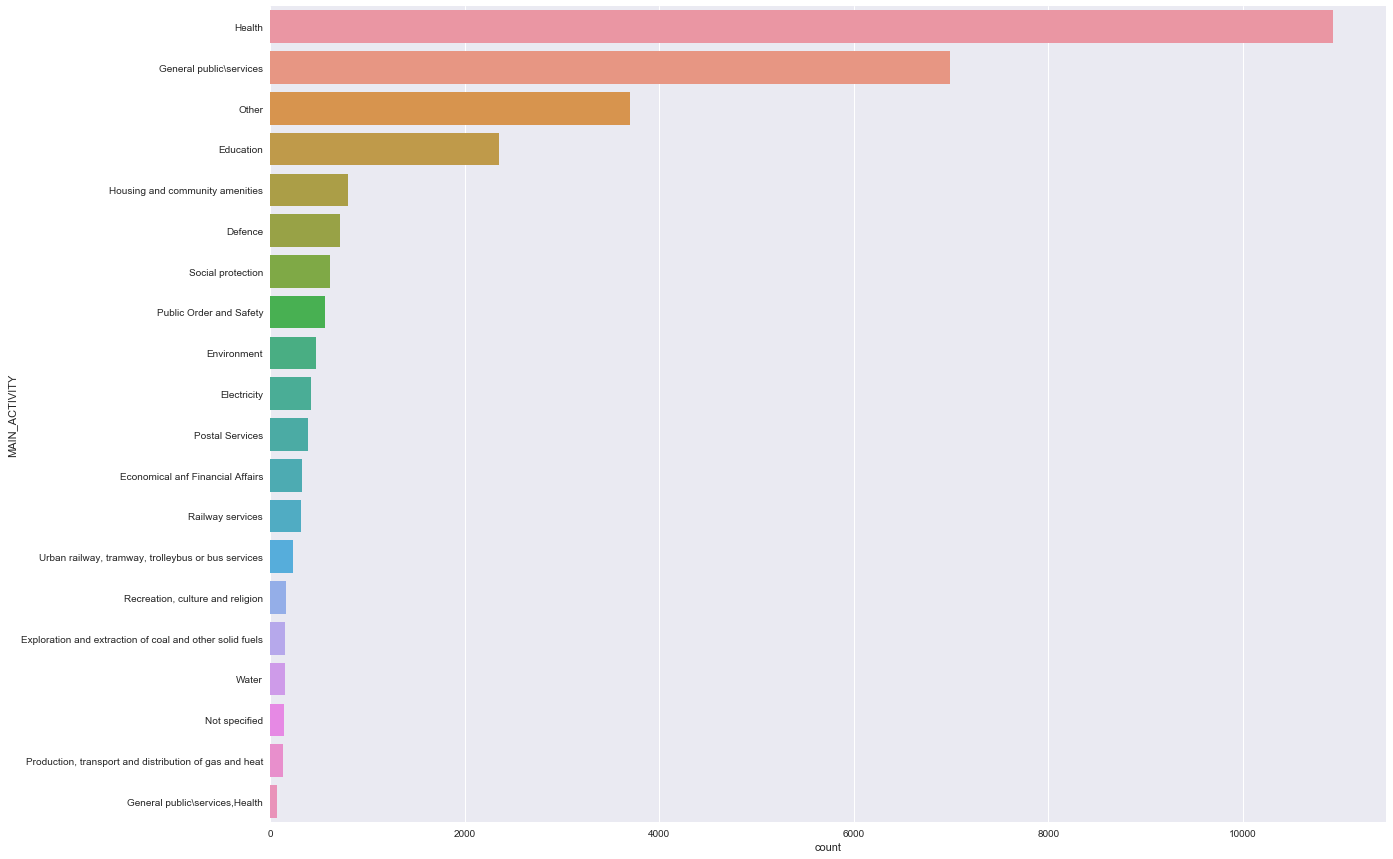

In [132]:
sns.countplot(y= df['MAIN_ACTIVITY'], order = df['MAIN_ACTIVITY'].value_counts().iloc[:20].index)

In [133]:
df_activity = percentager(df, 'MAIN_ACTIVITY')
df_activity.head(10)

/Users/Pablo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: 'MAIN_ACTIVITY' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  del sys.path[0]


,Total,Percentage
MAIN_ACTIVITY,,
Health,10927,36.42
General public\services,6992,23.31
Other,3697,12.32
Education,2350,7.83
Housing and community amenities,801,2.67
Defence,720,2.40
Social protection,618,2.06
Public Order and Safety,563,1.88
Environment,468,1.56


Text(0.5,1,'TYPE_OF_CONTRACT')

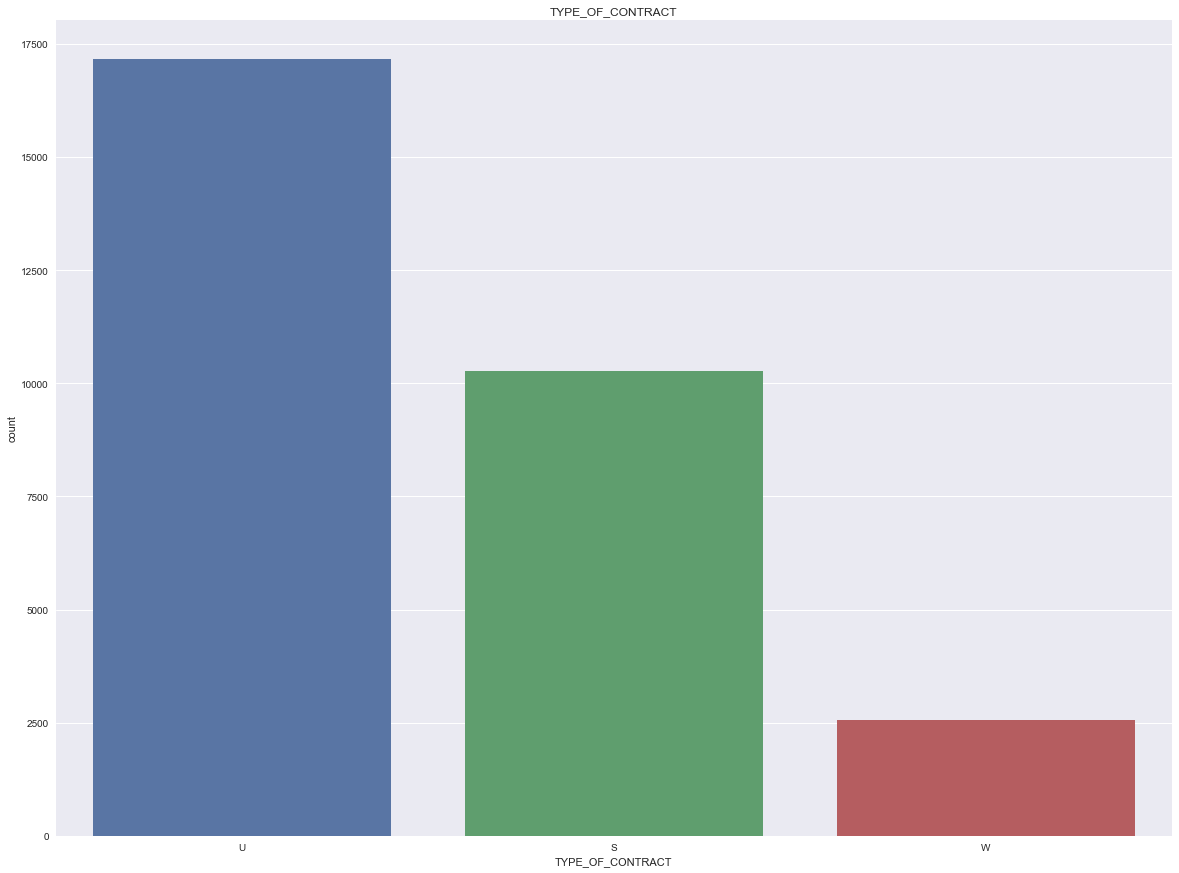

In [134]:
sns.countplot(df['TYPE_OF_CONTRACT'], order = df['TYPE_OF_CONTRACT'].value_counts().index).set_title('TYPE_OF_CONTRACT')

In [135]:
df_type = percentager(df, 'TYPE_OF_CONTRACT')
df_type

/Users/Pablo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: 'TYPE_OF_CONTRACT' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  del sys.path[0]


,Total,Percentage
TYPE_OF_CONTRACT,,
U,17165,57.22
S,10283,34.28
W,2552,8.51


Text(0.5,1,'XSD_VERSION')

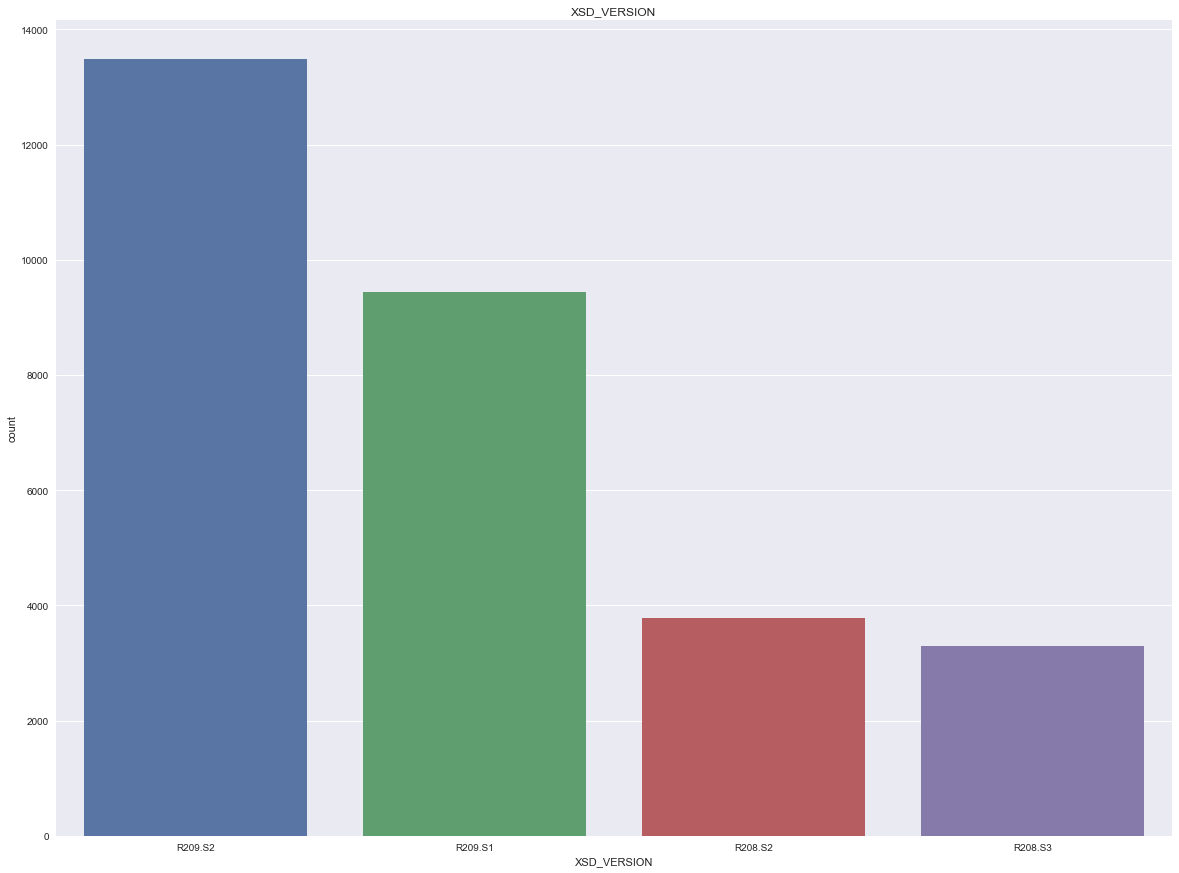

In [136]:
sns.countplot(df['XSD_VERSION'], order = df['XSD_VERSION'].value_counts().index).set_title('XSD_VERSION')

In [137]:
percentager(df, 'XSD_VERSION')

/Users/Pablo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: 'XSD_VERSION' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  del sys.path[0]


,Total,Percentage
XSD_VERSION,,
R209.S2,13483,44.94
R209.S1,9438,31.46
R208.S2,3784,12.61
R208.S3,3295,10.98


Text(0.5,1,'CAE_TYPE')

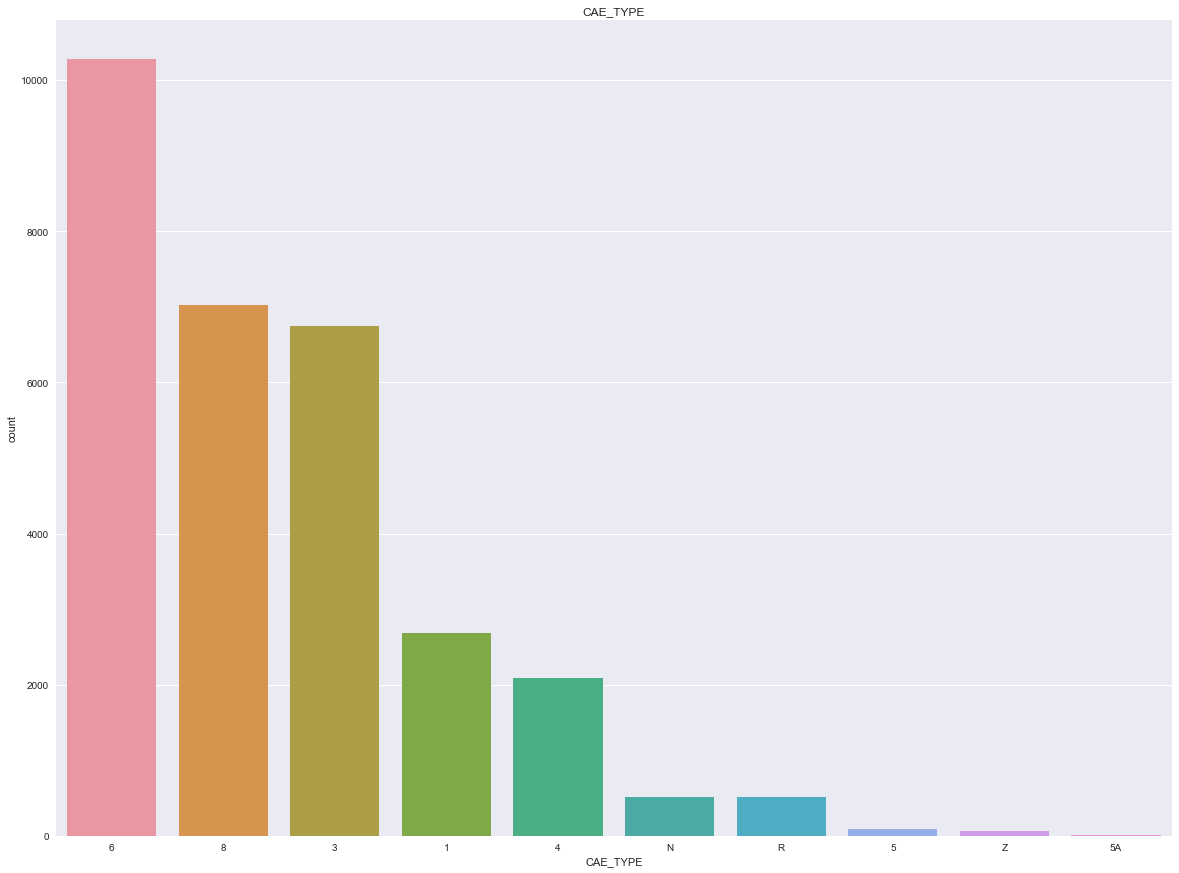

In [138]:
sns.countplot(df['CAE_TYPE'], order = df['CAE_TYPE'].value_counts().index).set_title('CAE_TYPE')

In [139]:
percentager(df, 'CAE_TYPE')

/Users/Pablo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: 'CAE_TYPE' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  del sys.path[0]


,Total,Percentage
CAE_TYPE,,
6,10277,34.26
8,7031,23.44
3,6741,22.47
1,2683,8.94
4,2090,6.97
N,512,1.71
R,508,1.69
5,91,0.30
Z,62,0.21


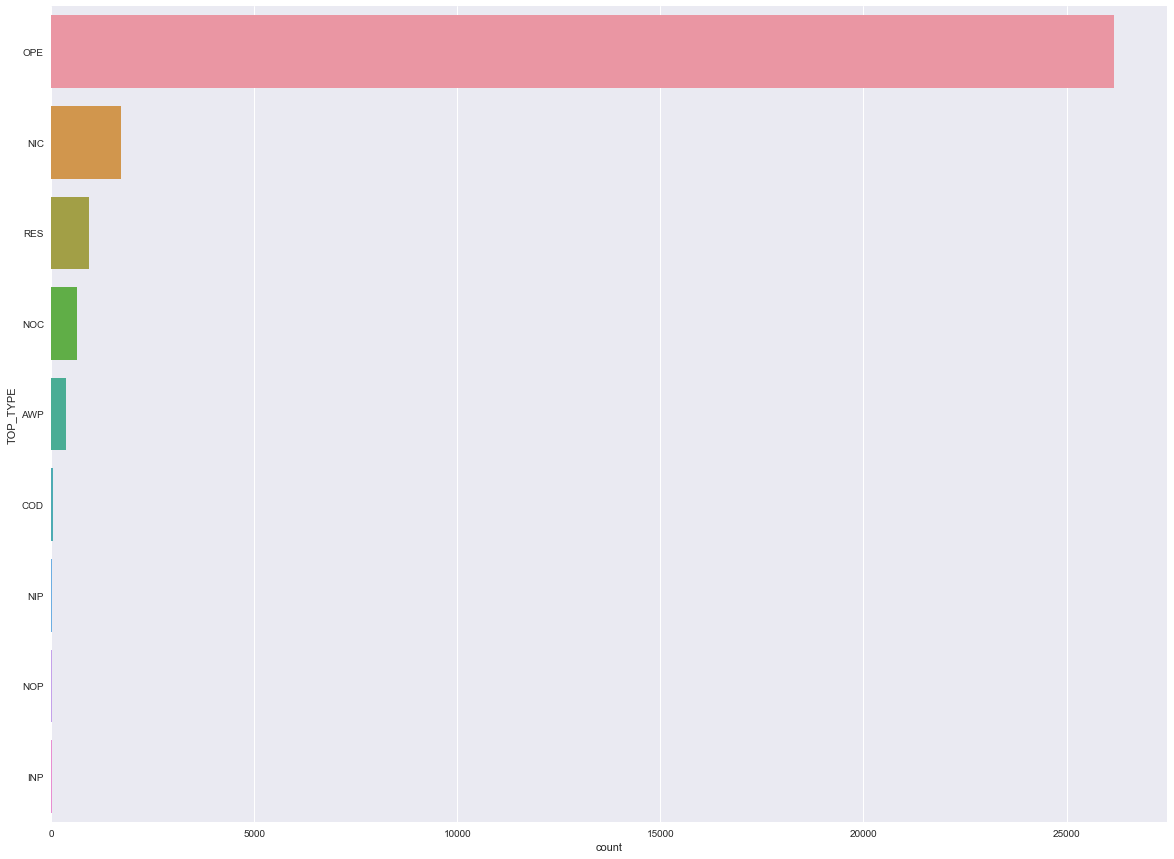

In [140]:
sns.countplot(y= df['TOP_TYPE'], order = df['TOP_TYPE'].value_counts().index)

In [141]:
percentager(df, 'TOP_TYPE')

/Users/Pablo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: 'TOP_TYPE' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  del sys.path[0]


,Total,Percentage
TOP_TYPE,,
OPE,26162,87.31
NIC,1719,5.74
RES,930,3.10
NOC,649,2.17
AWP,360,1.20
COD,49,0.16
NIP,34,0.11
NOP,33,0.11
INP,28,0.09


Text(0.5,1,'WIN_COUNTRY_CODE')

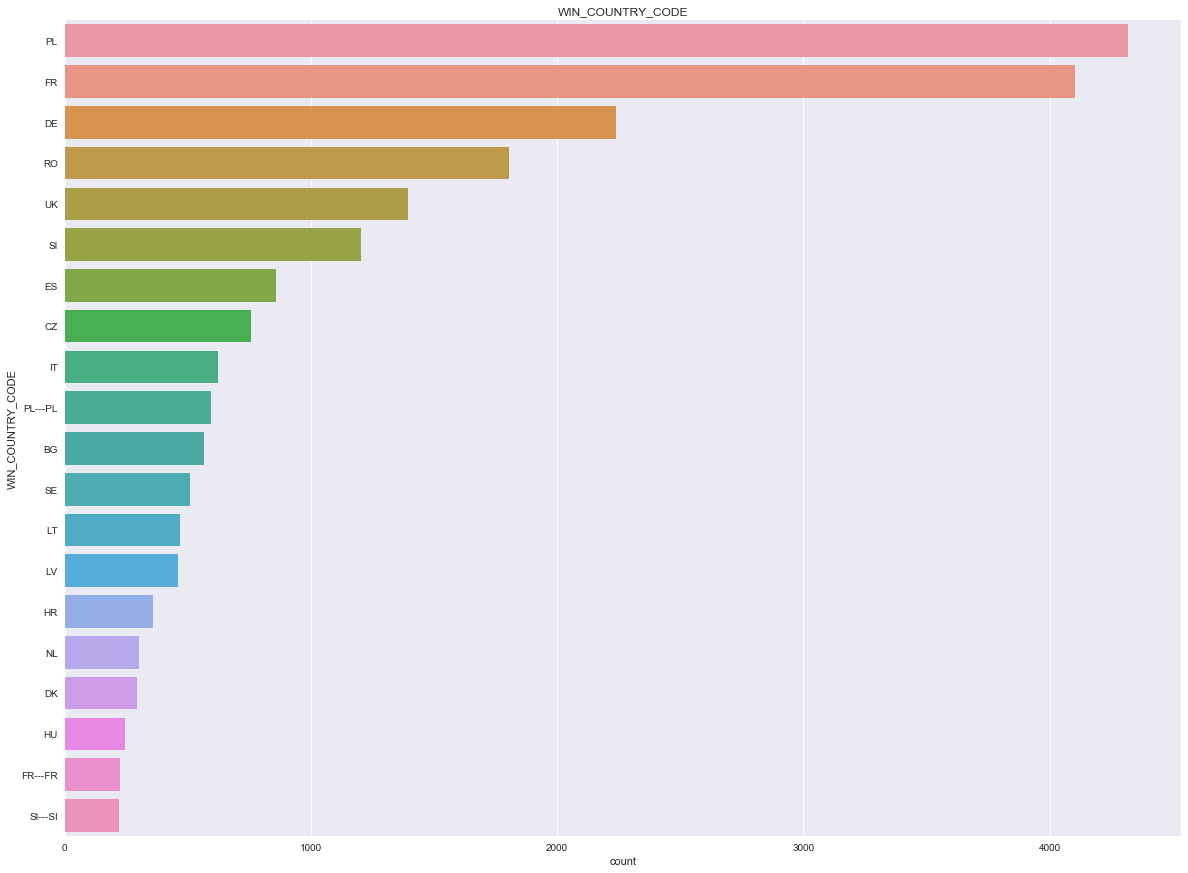

In [142]:
sns.countplot(y= df['WIN_COUNTRY_CODE'], order = df['WIN_COUNTRY_CODE'].value_counts().iloc[:20].index).set_title('WIN_COUNTRY_CODE')

Some country codes appear repeated in the column "WIN_COUNTRY_CODE" of the same sample. This is due to there are several parties involved in that contract, located in more than one town/zipcode in the same country. Let's tide up "WIN_COUNTRY_CODE" feature.

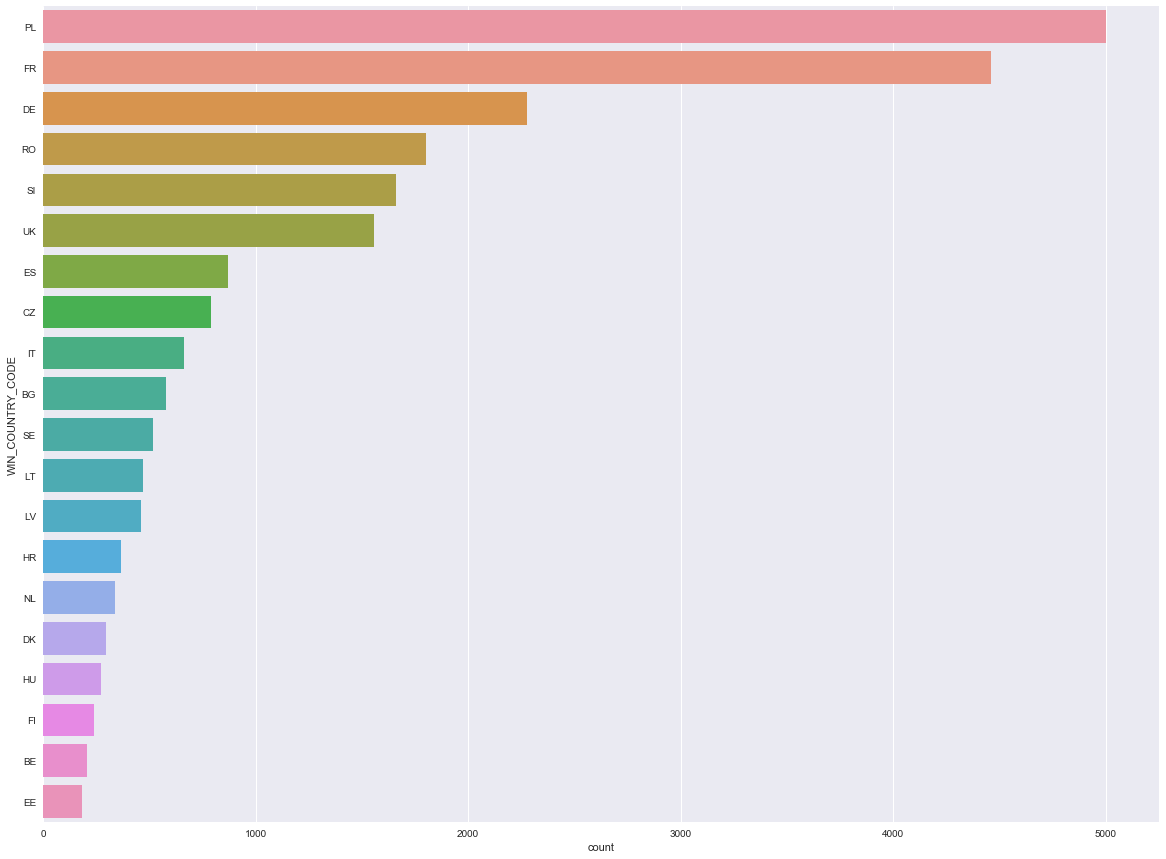

In [143]:
df['WIN_COUNTRY_CODE'] = df['WIN_COUNTRY_CODE'].map(lambda x: str(x)[:2])
df['WIN_COUNTRY_CODE'] = df['WIN_COUNTRY_CODE'].replace("na", np.nan).dropna()
df.dropna(subset = ['WIN_COUNTRY_CODE'], inplace=True)

sns.countplot(y= df['WIN_COUNTRY_CODE'], order = df['WIN_COUNTRY_CODE'].value_counts().iloc[:20].index)

In [144]:
df_winner = percentager(df, 'WIN_COUNTRY_CODE')
df_winner.head(10)

/Users/Pablo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: 'WIN_COUNTRY_CODE' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  del sys.path[0]


,Total,Percentage
WIN_COUNTRY_CODE,,
PL,5002,20.61
FR,4462,18.38
DE,2277,9.38
RO,1803,7.43
SI,1660,6.84
UK,1556,6.41
ES,870,3.58
CZ,790,3.25
IT,663,2.73


Poland was also the country winning more contracts for the considered period, with 20.61% of the total.

In [145]:
df_date = percentager(df, 'DT_AWARD')
df_date.head(10)

/Users/Pablo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: 'DT_AWARD' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  del sys.path[0]


,Total,Percentage
DT_AWARD,,
30-JUN-17,336,1.41
31-MAR-17,311,1.30
31-DEC-16,247,1.04
30-SEP-17,219,0.92
26-SEP-17,184,0.77
26-JUN-17,163,0.68
30-DEC-16,163,0.68
06-JUN-17,153,0.64
10-JAN-17,141,0.59


'DT_AWARD' shows that most contract awards happen on quarterly basis: at the end of March, June, September and December

In [146]:
def binner(df, column, bins):

    df['binned'] = pd.cut(df[column], bins = bins)    
    totals = df.groupby('binned')[column].count()
    df_binned = pd.DataFrame(totals, columns = [column])
    
    return df_binned

In [148]:
df_euro_m = df[['VALUE_EURO', 'VALUE_EURO_FIN_1', 'VALUE_EURO_FIN_2', 'AWARD_EST_VALUE_EURO', 'AWARD_VALUE_EURO', 'AWARD_VALUE_EURO_FIN_1']]/1e6
df_euro_m.describe()

,VALUE_EURO,VALUE_EURO_FIN_1,VALUE_EURO_FIN_2,AWARD_EST_VALUE_EURO,AWARD_VALUE_EURO,AWARD_VALUE_EURO_FIN_1
count,2.273800e+04,2.306800e+04,2.306800e+04,1.007000e+04,2.219700e+04,22784.000000
mean,2.033007e+01,1.443001e+03,1.443001e+03,4.902901e+00,3.983652e+00,4.021991
std,7.324195e+02,1.976482e+05,1.976482e+05,1.041555e+02,1.041227e+02,103.286348
min,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,0.000000
25%,1.943514e-01,1.402275e-01,1.402275e-01,4.380138e-03,2.862620e-03,0.002495
50%,5.457910e-01,4.535455e-01,4.535455e-01,3.769074e-02,3.287100e-02,0.031115
75%,2.068871e+00,1.699998e+00,1.699998e+00,2.793754e-01,2.403000e-01,0.237256
max,1.000000e+05,3.000000e+07,3.000000e+07,8.542002e+03,1.000000e+04,9999.999999


Monetary quantities are re-formatted in millions of EUR for easier reference.

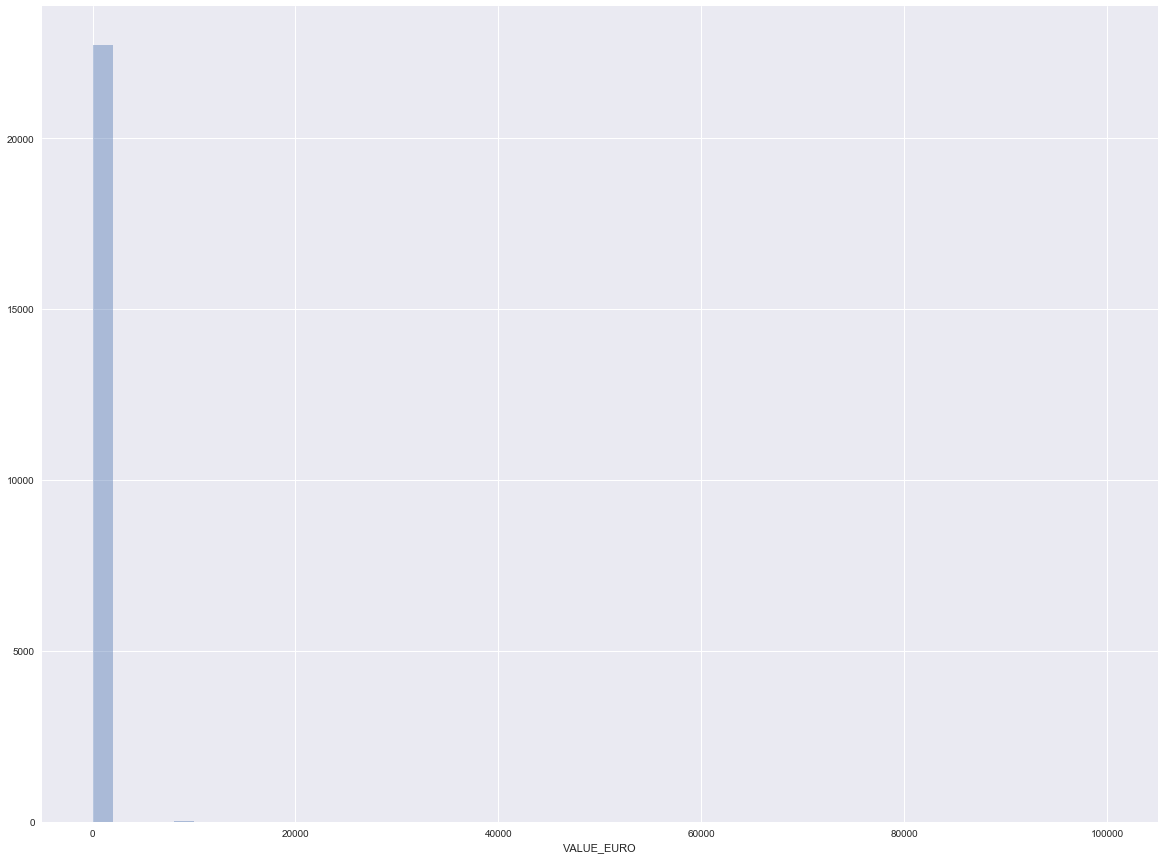

In [149]:
#df_euro_m['VALUE_EURO'].plot.hist()
sns.distplot(df_euro_m['VALUE_EURO'].dropna(), kde=False)

Most of the contracts have low initial value amounts in the distribution. Let's zoom in. 

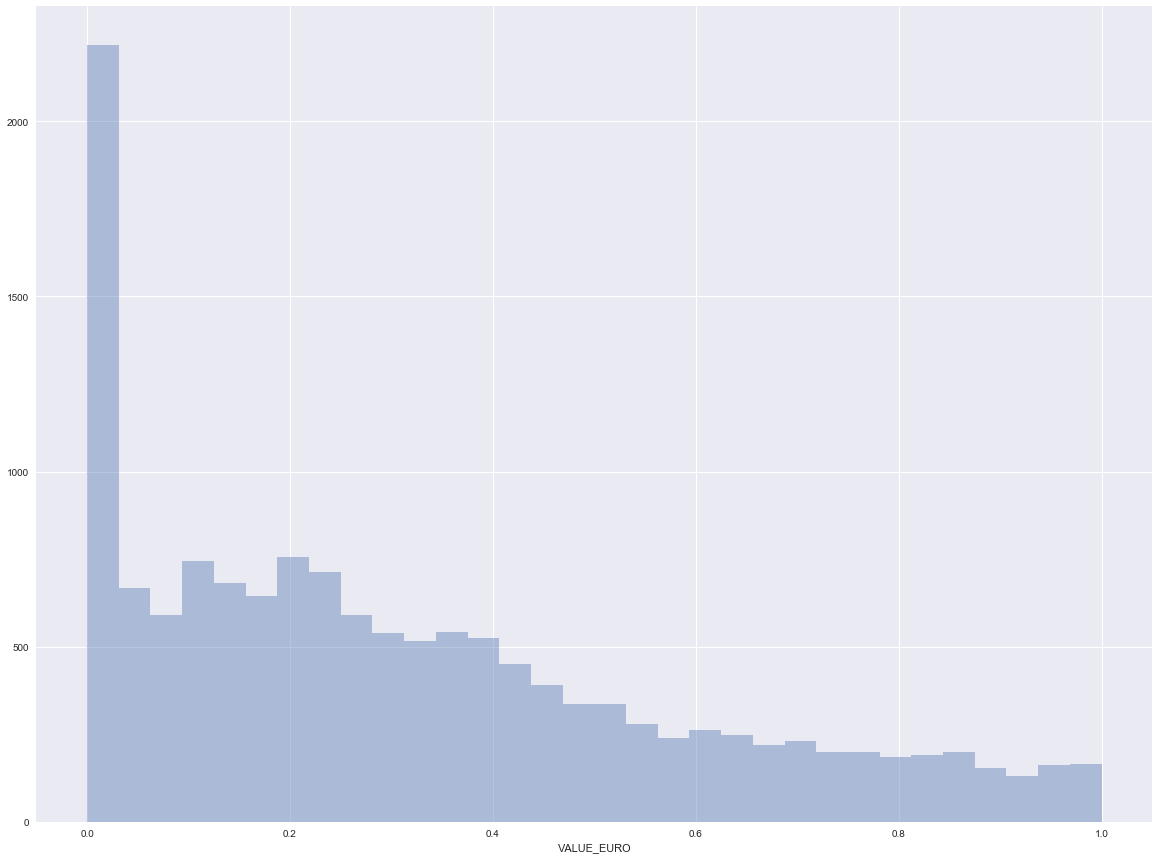

In [151]:
#df_euro_m[df_euro_m['VALUE_EURO'] < 1]['VALUE_EURO_FIN_2'].plot.hist()
sns.distplot(df_euro_m[df_euro_m['VALUE_EURO'] < 1]['VALUE_EURO'], kde=False)

Most of the contracts are below 1 million EUR initial valuation.

In [154]:
df_euro_m[df_euro_m['VALUE_EURO'] < 1]['VALUE_EURO'].count()/df_euro_m['VALUE_EURO'].count()

0.6288591784677632

62.89% of contracts are below 1 million EUR initial valuation.

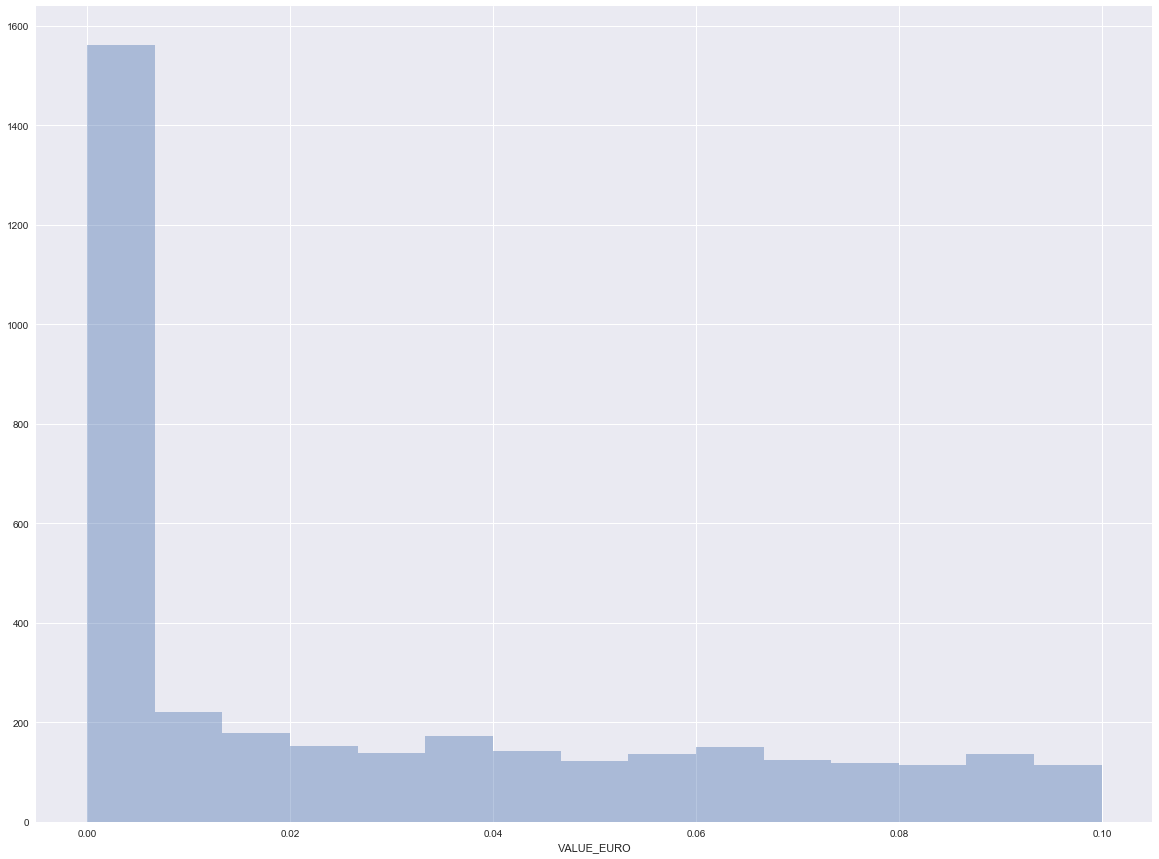

In [155]:
#df_euro_m[df_euro_m['VALUE_EURO'] < 0.1]['VALUE_EURO'].plot.hist()
sns.distplot(df_euro_m[df_euro_m['VALUE_EURO'] < 0.1]['VALUE_EURO'], kde=False)

In [156]:
df_euro_m[df_euro_m['VALUE_EURO'] < 1e-1]['VALUE_EURO'].count()/df_euro_m['VALUE_EURO'].count()

0.157665581845369

15.77% of contracts are below 100,000 EUR initial valuation.

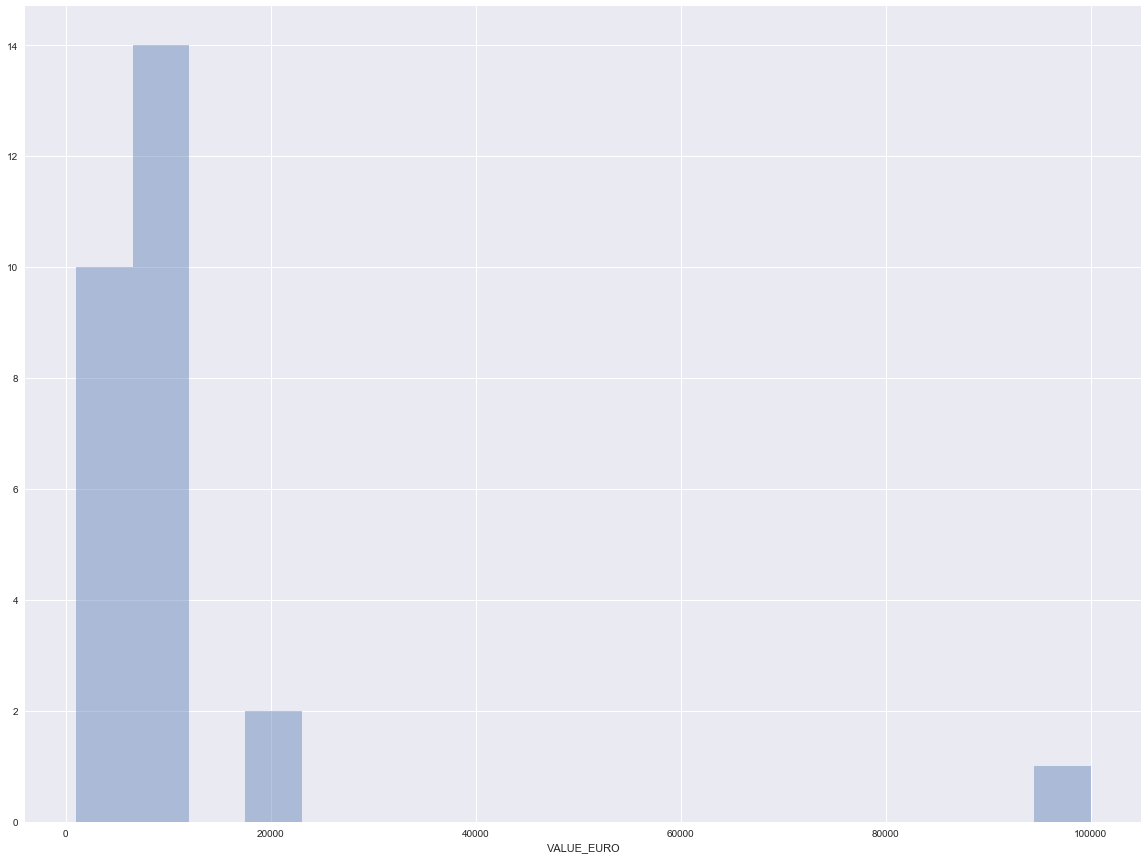

In [157]:
#df_euro_m[df_euro_m['VALUE_EURO'] > 1e+3]['VALUE'].plot.hist()
sns.distplot(df_euro_m[df_euro_m['VALUE_EURO'] > 1e+3]['VALUE_EURO'], kde=False)

In [158]:
df_euro_m[df_euro_m['VALUE_EURO'] > 1e+3]['VALUE_EURO'].count()

27

Just 27 contracts have an initial value above 1 billion EUR.

<h4>Contract initial value vs award final value</h4>

                  VALUE_EURO  AWARD_VALUE_EURO
binned                                        
(0.0, 0.1]              3606             14117
(0.1, 0.5]              7342              4491
(0.5, 1.0]              3399              1342
(1.0, 5.0]              5053              1532
(5.0, 10.0]             1219               289
(10.0, 50.0]            1427               266
(50.0, 100.0]            338                63
(100.0, 1000.0]          327                84
(1000.0, 5000.0]          10                10


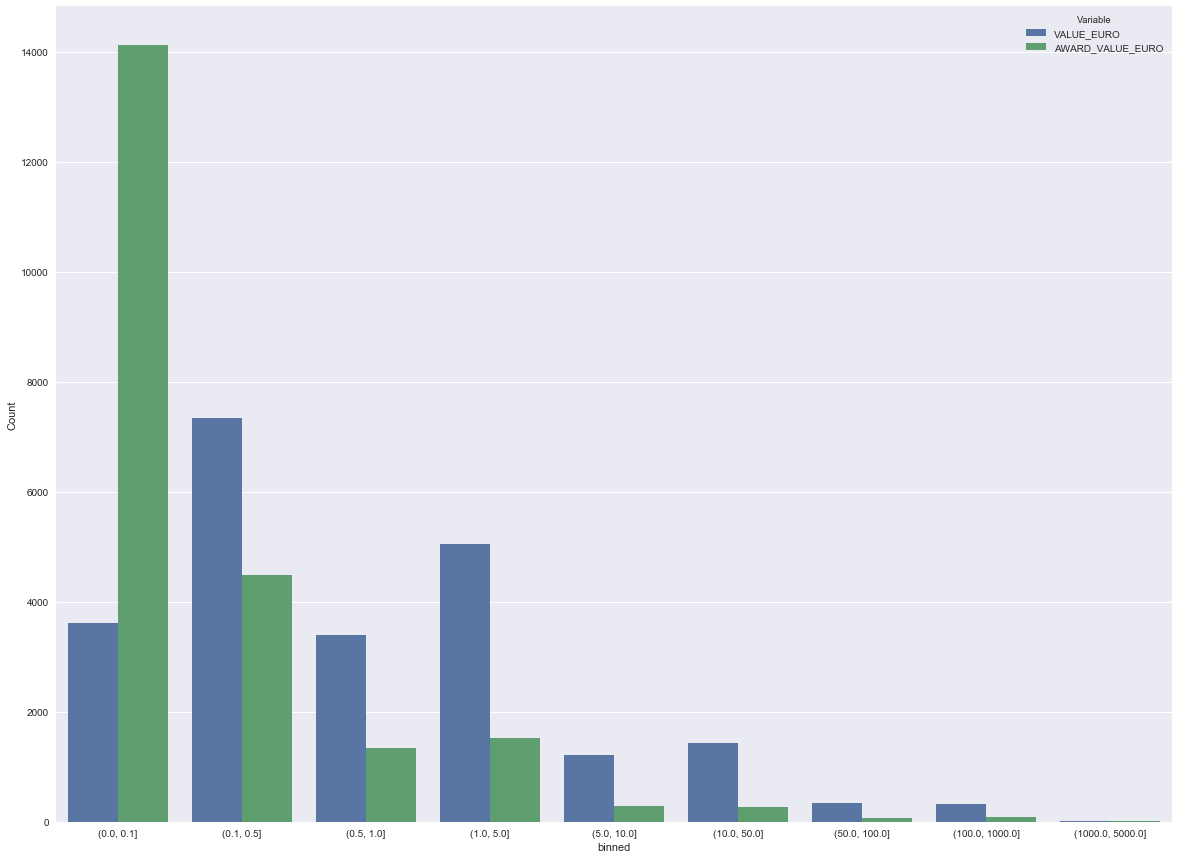

In [160]:
bin_value = [0,.1,.5,1,5,10,50,100,1000,5000]

df_value_binned = binner(df_euro_m, 'VALUE_EURO', bin_value)
df_award_binned = binner(df_euro_m, 'AWARD_VALUE_EURO', bin_value)

df_value_merged = df_value_binned.join(df_award_binned)

print(df_value_merged)

df_value_stacked = (df_value_merged.stack()
        .reset_index()
        .rename(columns={'level_1': 'Variable', 0: 'Count'}))

sns.barplot(x = 'binned', y = 'Count', hue='Variable', data = df_value_stacked)

<h4>Exploration of Number of offers</h4>

In [161]:
print(df['NUMBER_OFFERS'].describe())
print(df['NUMBER_OFFERS'].head())

count    23297.000000
mean         6.654891
std         27.507148
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max        999.000000
Name: NUMBER_OFFERS, dtype: float64
0     3.0
1    17.0
2     6.0
3     1.0
5     1.0
Name: NUMBER_OFFERS, dtype: float64


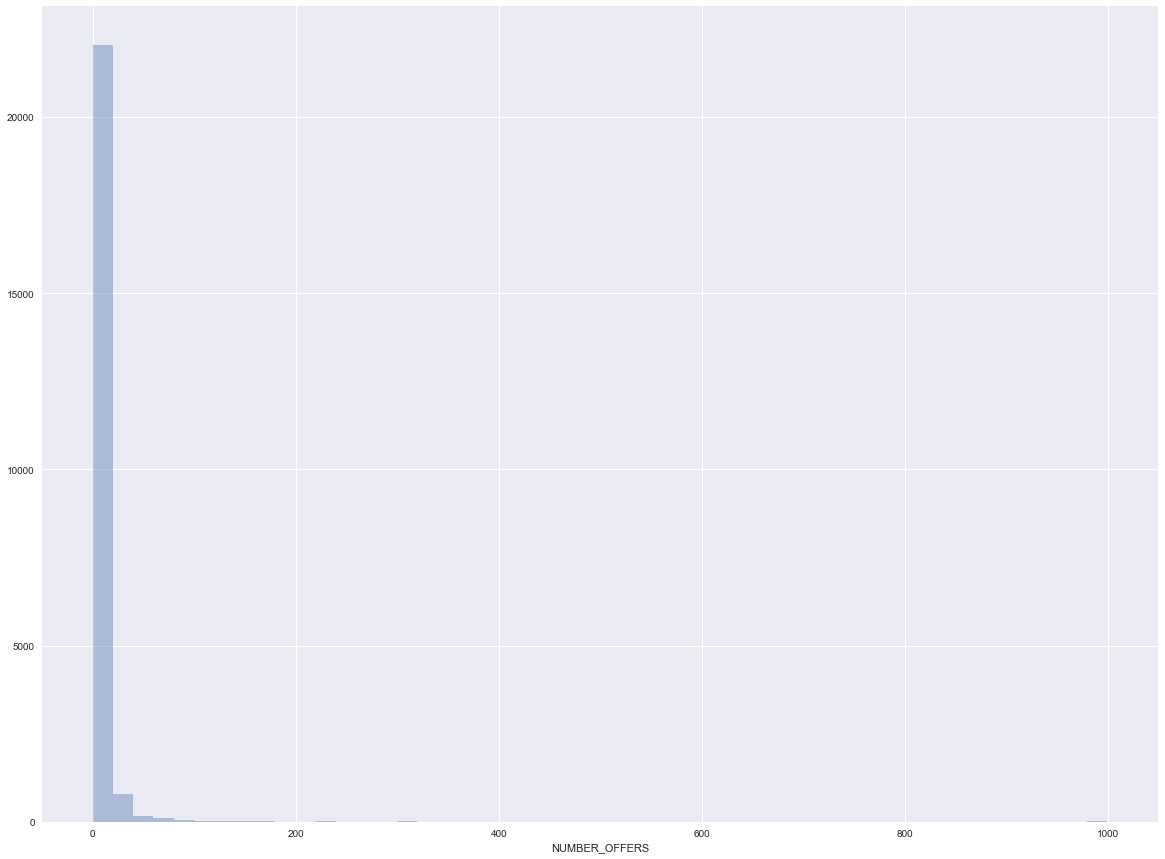

In [162]:
sns.distplot(df['NUMBER_OFFERS'].dropna(), kde=False)

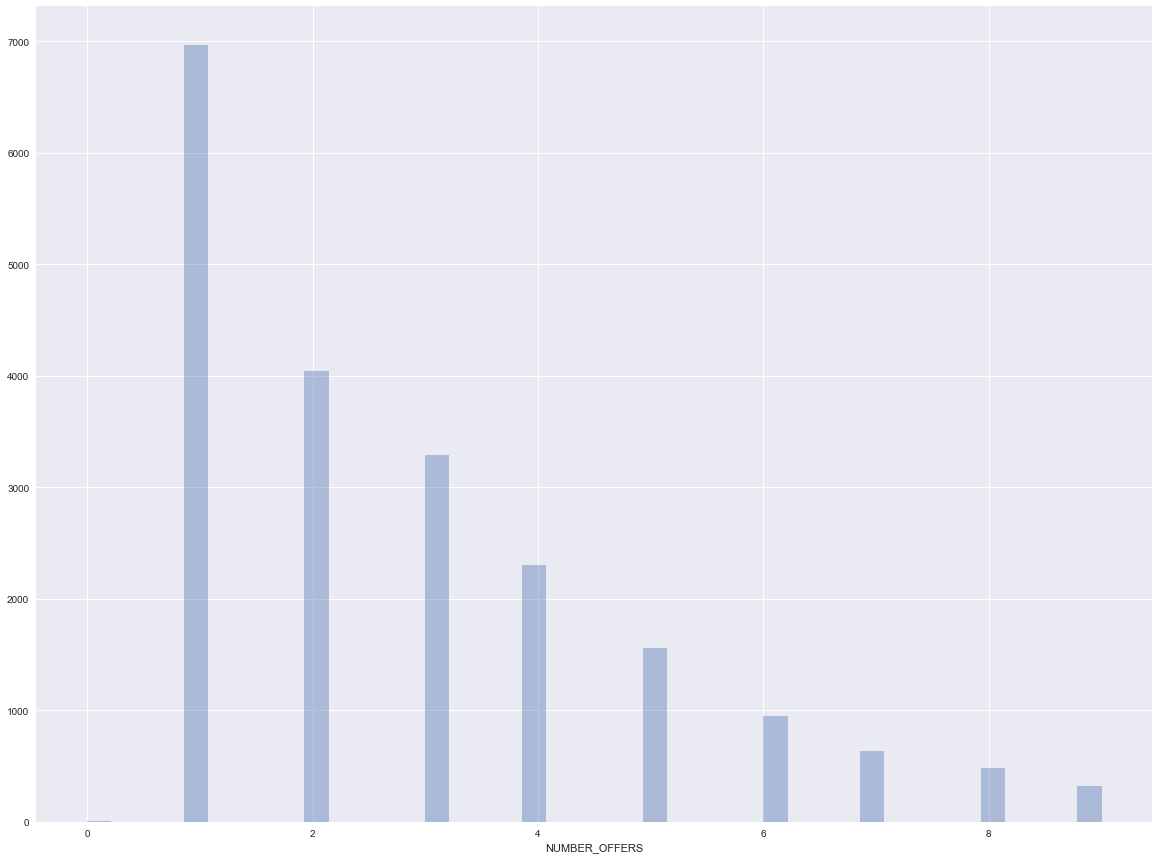

In [163]:
sns.distplot(df[df['NUMBER_OFFERS'] < 10]['NUMBER_OFFERS'], kde=False)

In [164]:
df[df['NUMBER_OFFERS'] < 10]['NUMBER_OFFERS'].count()

20571

             Total  Percentage
binned                        
(1, 5]       11195       48.07
(0, 1]        6965       29.91
(5, 10]       2673       11.48
(10, 50]      2098        9.01
(50, 100]      212        0.91
(100, 200]      90        0.39
(200, 500]      42        0.18
(500, 1000]     12        0.05


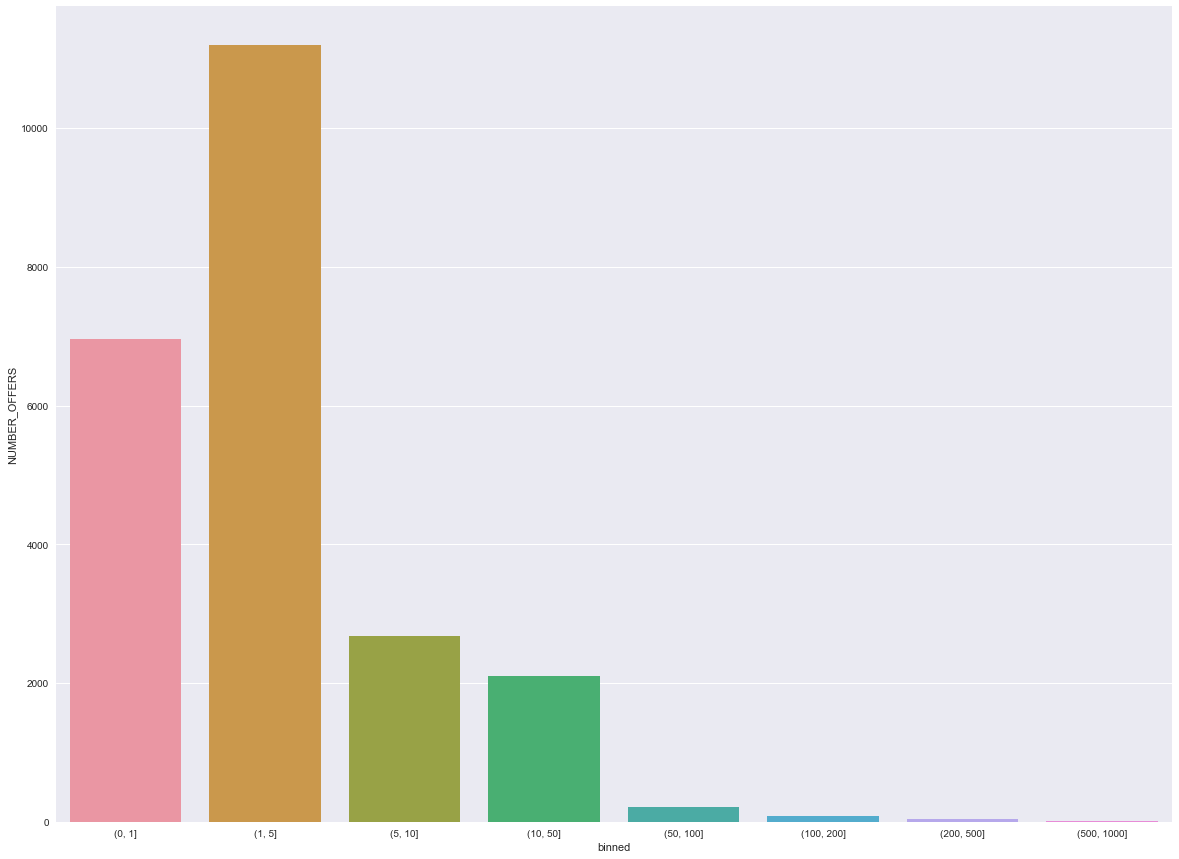

In [165]:
bin_offers = [0,1,5,10,50,100,200,500,1000]

df_offers_binned = binner(df, 'NUMBER_OFFERS', bin_offers)

print(percentager(df_offers_binned, 'NUMBER_OFFERS', binned=True))
sns.barplot(x = df_offers_binned.index, y = df_offers_binned['NUMBER_OFFERS'])

48.07% of contracts have 1 to 4 offers.

<h4>Number of main activities for contracts generated on UK</h4>

In [168]:
df.loc[df['ISO_COUNTRY_CODE'] == 'UK'].groupby('MAIN_ACTIVITY').nunique().count()['MAIN_ACTIVITY']

26

UK's contracts are focused on 26 main activities

<h4>Contry with more deviations between VALUE_EURO and AWARD_VALUE_EURO</h4>

In [169]:
df['VALUE_DEV'] = abs(df['AWARD_VALUE_EURO'] - df['VALUE_EURO'])

df.groupby('ISO_COUNTRY_CODE').count().sort_values('VALUE_DEV', ascending=False).index[0]

'PL'

Poland is the country with more deviations between contract initial value and award final value.

<h4>Most deviated contract in the dataset</h4>

In [170]:
df_dev = df.loc[df['VALUE_EURO'] != 0]
df_dev.sort_values('VALUE_DEV', ascending=False).iloc[0,:]

Unnamed: 0                                                           446177
ID_NOTICE_CAN                                                    2017349045
YEAR                                                                   2017
ID_TYPE                                                                   3
DT_DISPATCH                                                       04-SEP-17
XSD_VERSION                                                         R209.S2
CANCELLED                                                                 0
CORRECTIONS                                                               0
CAE_NAME                                   Conseil départemental des Vosges
CAE_NATIONALID                                                          NaN
CAE_TOWN                                                    Épinal Cedex 09
CAE_POSTAL_CODE                                                       88088
ISO_COUNTRY_CODE                                                         FR
CAE_TYPE    

<h2>Models</h2>

In [45]:
df_model = df.drop(["DT_DISPATCH", 
                    "CAE_NAME", 
                    "CAE_NATIONALID",
                    "CAE_TOWN", 
                    "CAE_POSTAL_CODE", 
                    "MAIN_ACTIVITY", 
                    "WIN_NAME", 
                    "WIN_TOWN", 
                    "WIN_POSTAL_CODE" , 
                    "WIN_COUNTRY_CODE", 
                    "TITLE",
                    "binned",
                    "VALUE_DEV"], axis=1)
df_model.describe()

,Unnamed: 0,ID_NOTICE_CAN,YEAR,ID_TYPE,CANCELLED,CORRECTIONS,VALUE_EURO,VALUE_EURO_FIN_1,VALUE_EURO_FIN_2,ID_AWARD,NUMBER_OFFERS,AWARD_EST_VALUE_EURO,AWARD_VALUE_EURO,AWARD_VALUE_EURO_FIN_1
count,24272.000000,2.427200e+04,24272.0,24272.000000,24272.000000,24272.000000,2.273800e+04,2.306800e+04,2.306800e+04,2.427200e+04,23297.000000,1.007000e+04,2.219700e+04,2.278400e+04
mean,352277.910514,1.631134e+09,2017.0,3.518293,0.000124,0.005026,2.033007e+07,1.443001e+09,1.443001e+09,8.109361e+06,6.654891,4.902901e+06,3.983652e+06,4.021991e+06
std,205549.593778,7.492757e+08,0.0,2.486450,0.011117,0.081037,7.324195e+08,1.976482e+11,1.976482e+11,1.933711e+05,27.507148,1.041555e+08,1.041227e+08,1.032863e+08
min,19.000000,2.017124e+06,2017.0,3.000000,0.000000,0.000000,1.000000e-02,1.000000e-02,1.000000e-02,7.775522e+06,0.000000,1.000000e-02,1.000000e-02,0.000000e+00
25%,174631.250000,2.017125e+09,2017.0,3.000000,0.000000,0.000000,1.943514e+05,1.402275e+05,1.402275e+05,7.942777e+06,1.000000,4.380137e+03,2.862620e+03,2.494785e+03
50%,352475.500000,2.017262e+09,2017.0,3.000000,0.000000,0.000000,5.457910e+05,4.535455e+05,4.535455e+05,8.109215e+06,3.000000,3.769074e+04,3.287100e+04,3.111468e+04
75%,530435.750000,2.017395e+09,2017.0,3.000000,0.000000,0.000000,2.068871e+06,1.699998e+06,1.699998e+06,8.276272e+06,5.000000,2.793754e+05,2.403000e+05,2.372558e+05
max,708838.000000,2.017529e+09,2017.0,25.000000,1.000000,3.000000,1.000000e+11,3.000000e+13,3.000000e+13,8.447078e+06,999.000000,8.542002e+09,1.000000e+10,1.000000e+10


In [46]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24272 entries, 0 to 29999
Data columns (total 20 columns):
Unnamed: 0                24272 non-null int64
ID_NOTICE_CAN             24272 non-null int64
YEAR                      24272 non-null int64
ID_TYPE                   24272 non-null int64
XSD_VERSION               24272 non-null object
CANCELLED                 24272 non-null int64
CORRECTIONS               24272 non-null int64
ISO_COUNTRY_CODE          24272 non-null object
CAE_TYPE                  24272 non-null object
TYPE_OF_CONTRACT          24272 non-null object
VALUE_EURO                22738 non-null float64
VALUE_EURO_FIN_1          23068 non-null float64
VALUE_EURO_FIN_2          23068 non-null float64
TOP_TYPE                  24247 non-null object
ID_AWARD                  24272 non-null float64
NUMBER_OFFERS             23297 non-null float64
AWARD_EST_VALUE_EURO      10070 non-null float64
AWARD_VALUE_EURO          22197 non-null float64
AWARD_VALUE_EURO_FIN_1    

In [47]:
df_model.isnull().sum()

Unnamed: 0                    0
ID_NOTICE_CAN                 0
YEAR                          0
ID_TYPE                       0
XSD_VERSION                   0
CANCELLED                     0
CORRECTIONS                   0
ISO_COUNTRY_CODE              0
CAE_TYPE                      0
TYPE_OF_CONTRACT              0
VALUE_EURO                 1534
VALUE_EURO_FIN_1           1204
VALUE_EURO_FIN_2           1204
TOP_TYPE                     25
ID_AWARD                      0
NUMBER_OFFERS               975
AWARD_EST_VALUE_EURO      14202
AWARD_VALUE_EURO           2075
AWARD_VALUE_EURO_FIN_1     1488
DT_AWARD                    416
dtype: int64

<h4>Dropping samples in features with low total NaN values (below 1000 samples)</h4>

In [48]:
df_model.dropna(subset = ['TOP_TYPE', 'NUMBER_OFFERS', 'DT_AWARD'], inplace = True)
df_model.isnull().sum()

Unnamed: 0                    0
ID_NOTICE_CAN                 0
YEAR                          0
ID_TYPE                       0
XSD_VERSION                   0
CANCELLED                     0
CORRECTIONS                   0
ISO_COUNTRY_CODE              0
CAE_TYPE                      0
TYPE_OF_CONTRACT              0
VALUE_EURO                  904
VALUE_EURO_FIN_1            449
VALUE_EURO_FIN_2            449
TOP_TYPE                      0
ID_AWARD                      0
NUMBER_OFFERS                 0
AWARD_EST_VALUE_EURO      13080
AWARD_VALUE_EURO           1190
AWARD_VALUE_EURO_FIN_1      667
DT_AWARD                      0
dtype: int64

<h4>Imputing median in features with higher total NaN values (above 1000 in former dataset)</h4>

In [49]:
for column in ['VALUE_EURO',
               'VALUE_EURO_FIN_1',
               'VALUE_EURO_FIN_2',
               'AWARD_VALUE_EURO', 
               'AWARD_VALUE_EURO_FIN_1']:
    
    df_model[column] = df_model.groupby('TYPE_OF_CONTRACT')[column].apply(lambda x: x.fillna(x.median()))

<h4>Dropping features with extreme amount of NaN values</h4>

In [50]:
df_model.drop('AWARD_EST_VALUE_EURO', axis=1, inplace = True)

In [51]:
df_model.describe()

,Unnamed: 0,ID_NOTICE_CAN,YEAR,ID_TYPE,CANCELLED,CORRECTIONS,VALUE_EURO,VALUE_EURO_FIN_1,VALUE_EURO_FIN_2,ID_AWARD,NUMBER_OFFERS,AWARD_VALUE_EURO,AWARD_VALUE_EURO_FIN_1
count,22982.000000,2.298200e+04,22982.0,22982.000000,22982.000000,22982.000000,2.298200e+04,2.298200e+04,2.298200e+04,2.298200e+04,22982.000000,2.298200e+04,2.298200e+04
mean,350777.599078,1.636302e+09,2017.0,3.456444,0.000131,0.005004,1.985394e+07,1.447712e+09,1.447712e+09,8.110996e+06,6.700418,3.817427e+06,3.861586e+06
std,205262.737065,7.456044e+08,0.0,2.424599,0.011425,0.080905,7.285039e+08,1.980176e+11,1.980176e+11,1.933364e+05,27.683394,1.023025e+08,1.023469e+08
min,19.000000,2.017124e+06,2017.0,3.000000,0.000000,0.000000,1.000000e-02,1.000000e-02,1.000000e-02,7.775522e+06,0.000000,1.000000e-02,0.000000e+00
25%,173190.000000,2.017126e+09,2017.0,3.000000,0.000000,0.000000,2.008394e+05,1.422259e+05,1.422259e+05,7.944732e+06,1.000000,3.199392e+03,2.667688e+03
50%,350489.500000,2.017263e+09,2017.0,3.000000,0.000000,0.000000,5.000000e+05,4.329057e+05,4.329057e+05,8.111460e+06,3.000000,3.338917e+04,3.128864e+04
75%,528616.000000,2.017396e+09,2017.0,3.000000,0.000000,0.000000,1.883901e+06,1.624615e+06,1.624615e+06,8.278258e+06,5.000000,2.271410e+05,2.279552e+05
max,708838.000000,2.017529e+09,2017.0,25.000000,1.000000,3.000000,1.000000e+11,3.000000e+13,3.000000e+13,8.447078e+06,999.000000,1.000000e+10,1.000000e+10


<h4>Managing outliers in continuous features</h4>

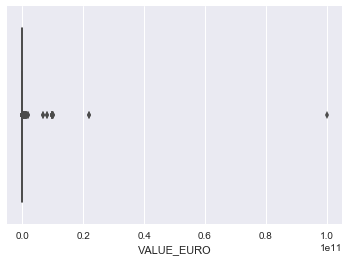

In [52]:
sns.boxplot(x = df_model['VALUE_EURO'])

In [53]:
df_model = df_model[np.abs(df_model['VALUE_EURO'] - df_model['VALUE_EURO'].mean()) <= (3 * df_model['VALUE_EURO'].std())]

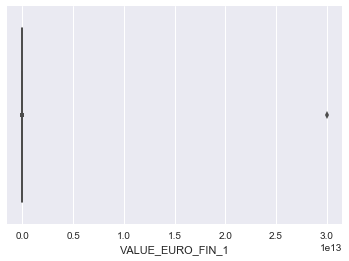

In [54]:
sns.boxplot(x = df_model['VALUE_EURO_FIN_1'])

In [55]:
df_model = df_model[np.abs(df_model['VALUE_EURO_FIN_1'] - df_model['VALUE_EURO_FIN_1'].mean()) <= (3 * df_model['VALUE_EURO_FIN_1'].std())]

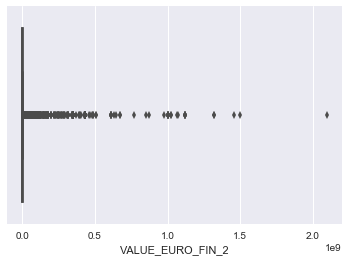

In [56]:
sns.boxplot(x = df_model['VALUE_EURO_FIN_2'])

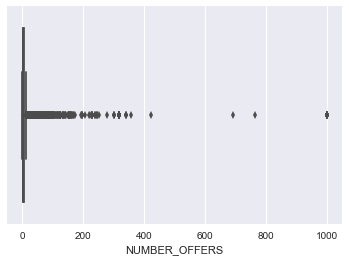

In [57]:
sns.boxplot(x = df_model['NUMBER_OFFERS'])

In [58]:
df_model = df_model[np.abs(df_model['NUMBER_OFFERS'] - df_model['NUMBER_OFFERS'].mean()) <= (3 * df_model['NUMBER_OFFERS'].std())]

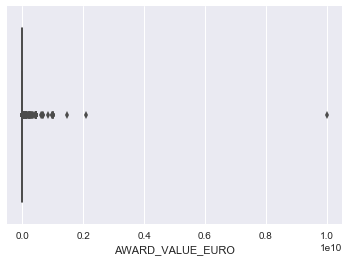

In [59]:
sns.boxplot(x = df_model['AWARD_VALUE_EURO'])

In [60]:
df_model = df_model[np.abs(df_model['AWARD_VALUE_EURO'] - df_model['AWARD_VALUE_EURO'].mean()) <= (3 * df_model['AWARD_VALUE_EURO'].std())]

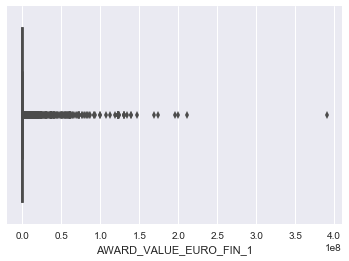

In [61]:
sns.boxplot(x = df_model['AWARD_VALUE_EURO_FIN_1'])

In [62]:
df_model = df_model[np.abs(df_model['AWARD_VALUE_EURO_FIN_1'] - df_model['AWARD_VALUE_EURO_FIN_1'].mean()) <= (3 * df_model['AWARD_VALUE_EURO_FIN_1'].std())]

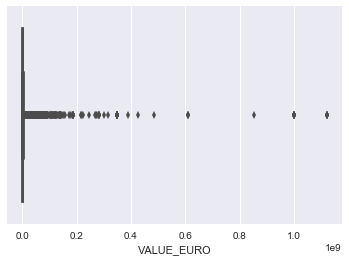

In [63]:
sns.boxplot(x = df_model['VALUE_EURO'])

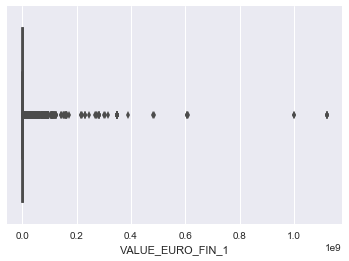

In [64]:
sns.boxplot(x = df_model['VALUE_EURO_FIN_1'])

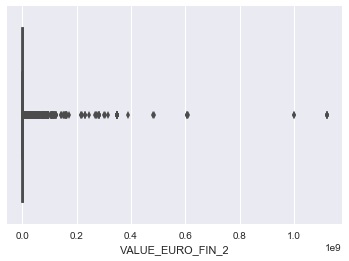

In [65]:
sns.boxplot(x = df_model['VALUE_EURO_FIN_2'])

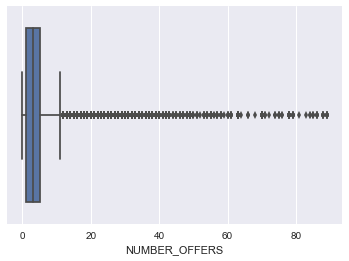

In [66]:
sns.boxplot(x = df_model['NUMBER_OFFERS'])

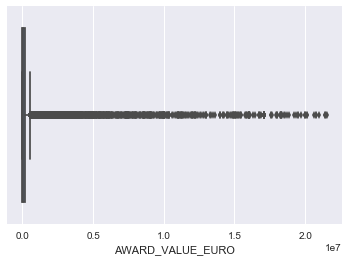

In [67]:
sns.boxplot(x = df_model['AWARD_VALUE_EURO'])

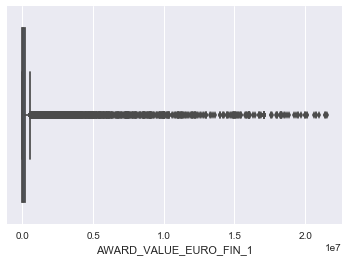

In [68]:
sns.boxplot(x = df_model['AWARD_VALUE_EURO_FIN_1'])

In [69]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22576 entries, 0 to 29999
Data columns (total 19 columns):
Unnamed: 0                22576 non-null int64
ID_NOTICE_CAN             22576 non-null int64
YEAR                      22576 non-null int64
ID_TYPE                   22576 non-null int64
XSD_VERSION               22576 non-null object
CANCELLED                 22576 non-null int64
CORRECTIONS               22576 non-null int64
ISO_COUNTRY_CODE          22576 non-null object
CAE_TYPE                  22576 non-null object
TYPE_OF_CONTRACT          22576 non-null object
VALUE_EURO                22576 non-null float64
VALUE_EURO_FIN_1          22576 non-null float64
VALUE_EURO_FIN_2          22576 non-null float64
TOP_TYPE                  22576 non-null object
ID_AWARD                  22576 non-null float64
NUMBER_OFFERS             22576 non-null float64
AWARD_VALUE_EURO          22576 non-null float64
AWARD_VALUE_EURO_FIN_1    22576 non-null float64
DT_AWARD                  

<h4>Class imbalance</h4>

In [70]:
df_type['Total'][0]/df_type['Total'][2]

6.726097178683386

Ratio 6.726/1 between most and less represented classes.

<h4>Encoding categorical features</h4>

In [71]:
for column in ['XSD_VERSION', 'ISO_COUNTRY_CODE', 'CAE_TYPE', 'TYPE_OF_CONTRACT', 'TOP_TYPE', 'DT_AWARD']:
    lb_maker = LabelEncoder()
    df_model[column] = lb_maker.fit_transform(df_model[column])

In [72]:
df_model.head()

,Unnamed: 0,ID_NOTICE_CAN,YEAR,ID_TYPE,XSD_VERSION,CANCELLED,CORRECTIONS,ISO_COUNTRY_CODE,CAE_TYPE,TYPE_OF_CONTRACT,VALUE_EURO,VALUE_EURO_FIN_1,VALUE_EURO_FIN_2,TOP_TYPE,ID_AWARD,NUMBER_OFFERS,AWARD_VALUE_EURO,AWARD_VALUE_EURO_FIN_1,DT_AWARD
0,701785,201788281,2017,3,2,0,0,11,6,0,2.578550e+05,2.578550e+05,2.578550e+05,3,7903596.0,3.0,257855.00,257855.00,586
1,18948,2017462007,2017,3,3,0,0,32,1,0,3.501367e+08,3.501367e+08,3.501367e+08,7,8361630.0,17.0,3331759.16,3331759.16,560
2,571268,2017469616,2017,3,1,0,0,28,5,1,3.513013e+05,3.513013e+05,3.513013e+05,7,8370274.0,6.0,4489.58,4489.58,210
3,372379,2017518456,2017,3,3,0,0,11,5,1,1.000000e+00,1.000000e+00,1.000000e+00,7,8433233.0,1.0,1.00,1.00,98
5,680705,201779390,2017,3,0,0,0,26,6,1,8.377988e+04,1.082829e+05,1.082829e+05,7,7893542.0,1.0,617.67,617.67,633


<h3>Correlation Matrix</h3>

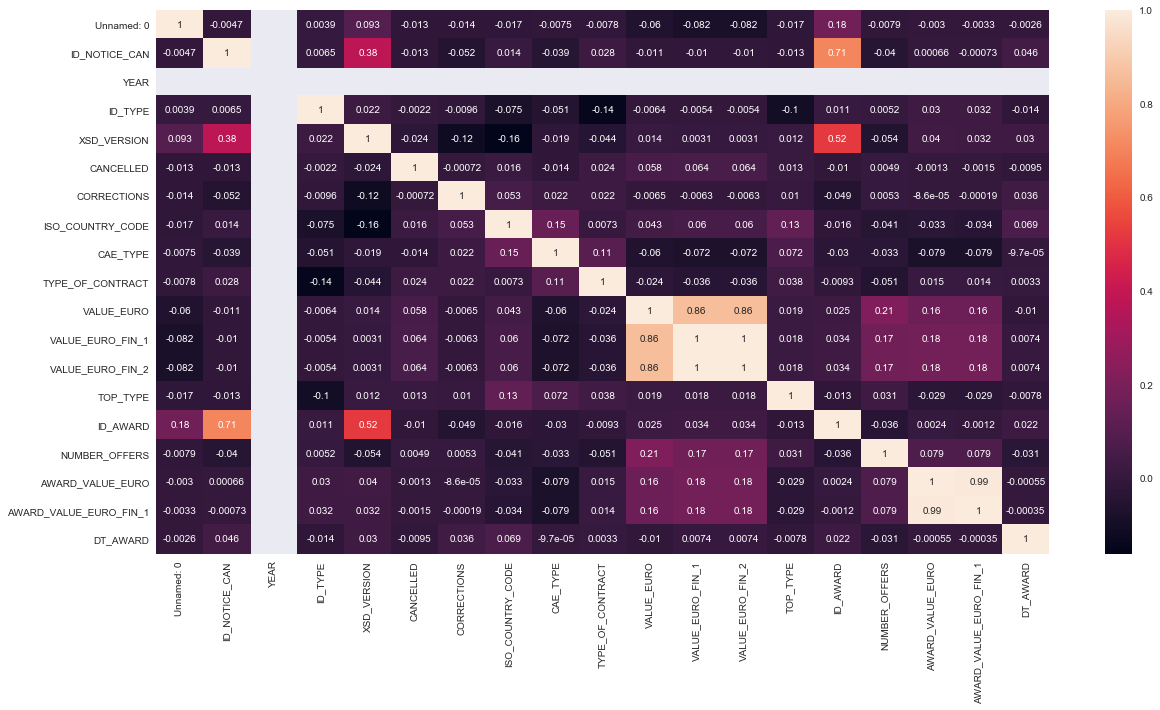

In [73]:
df_corr = df_model.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(df_corr, xticklabels = df_corr.columns.values, yticklabels = df_corr.columns.values, annot = True);

/Users/Pablo/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/Pablo/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/Pablo/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


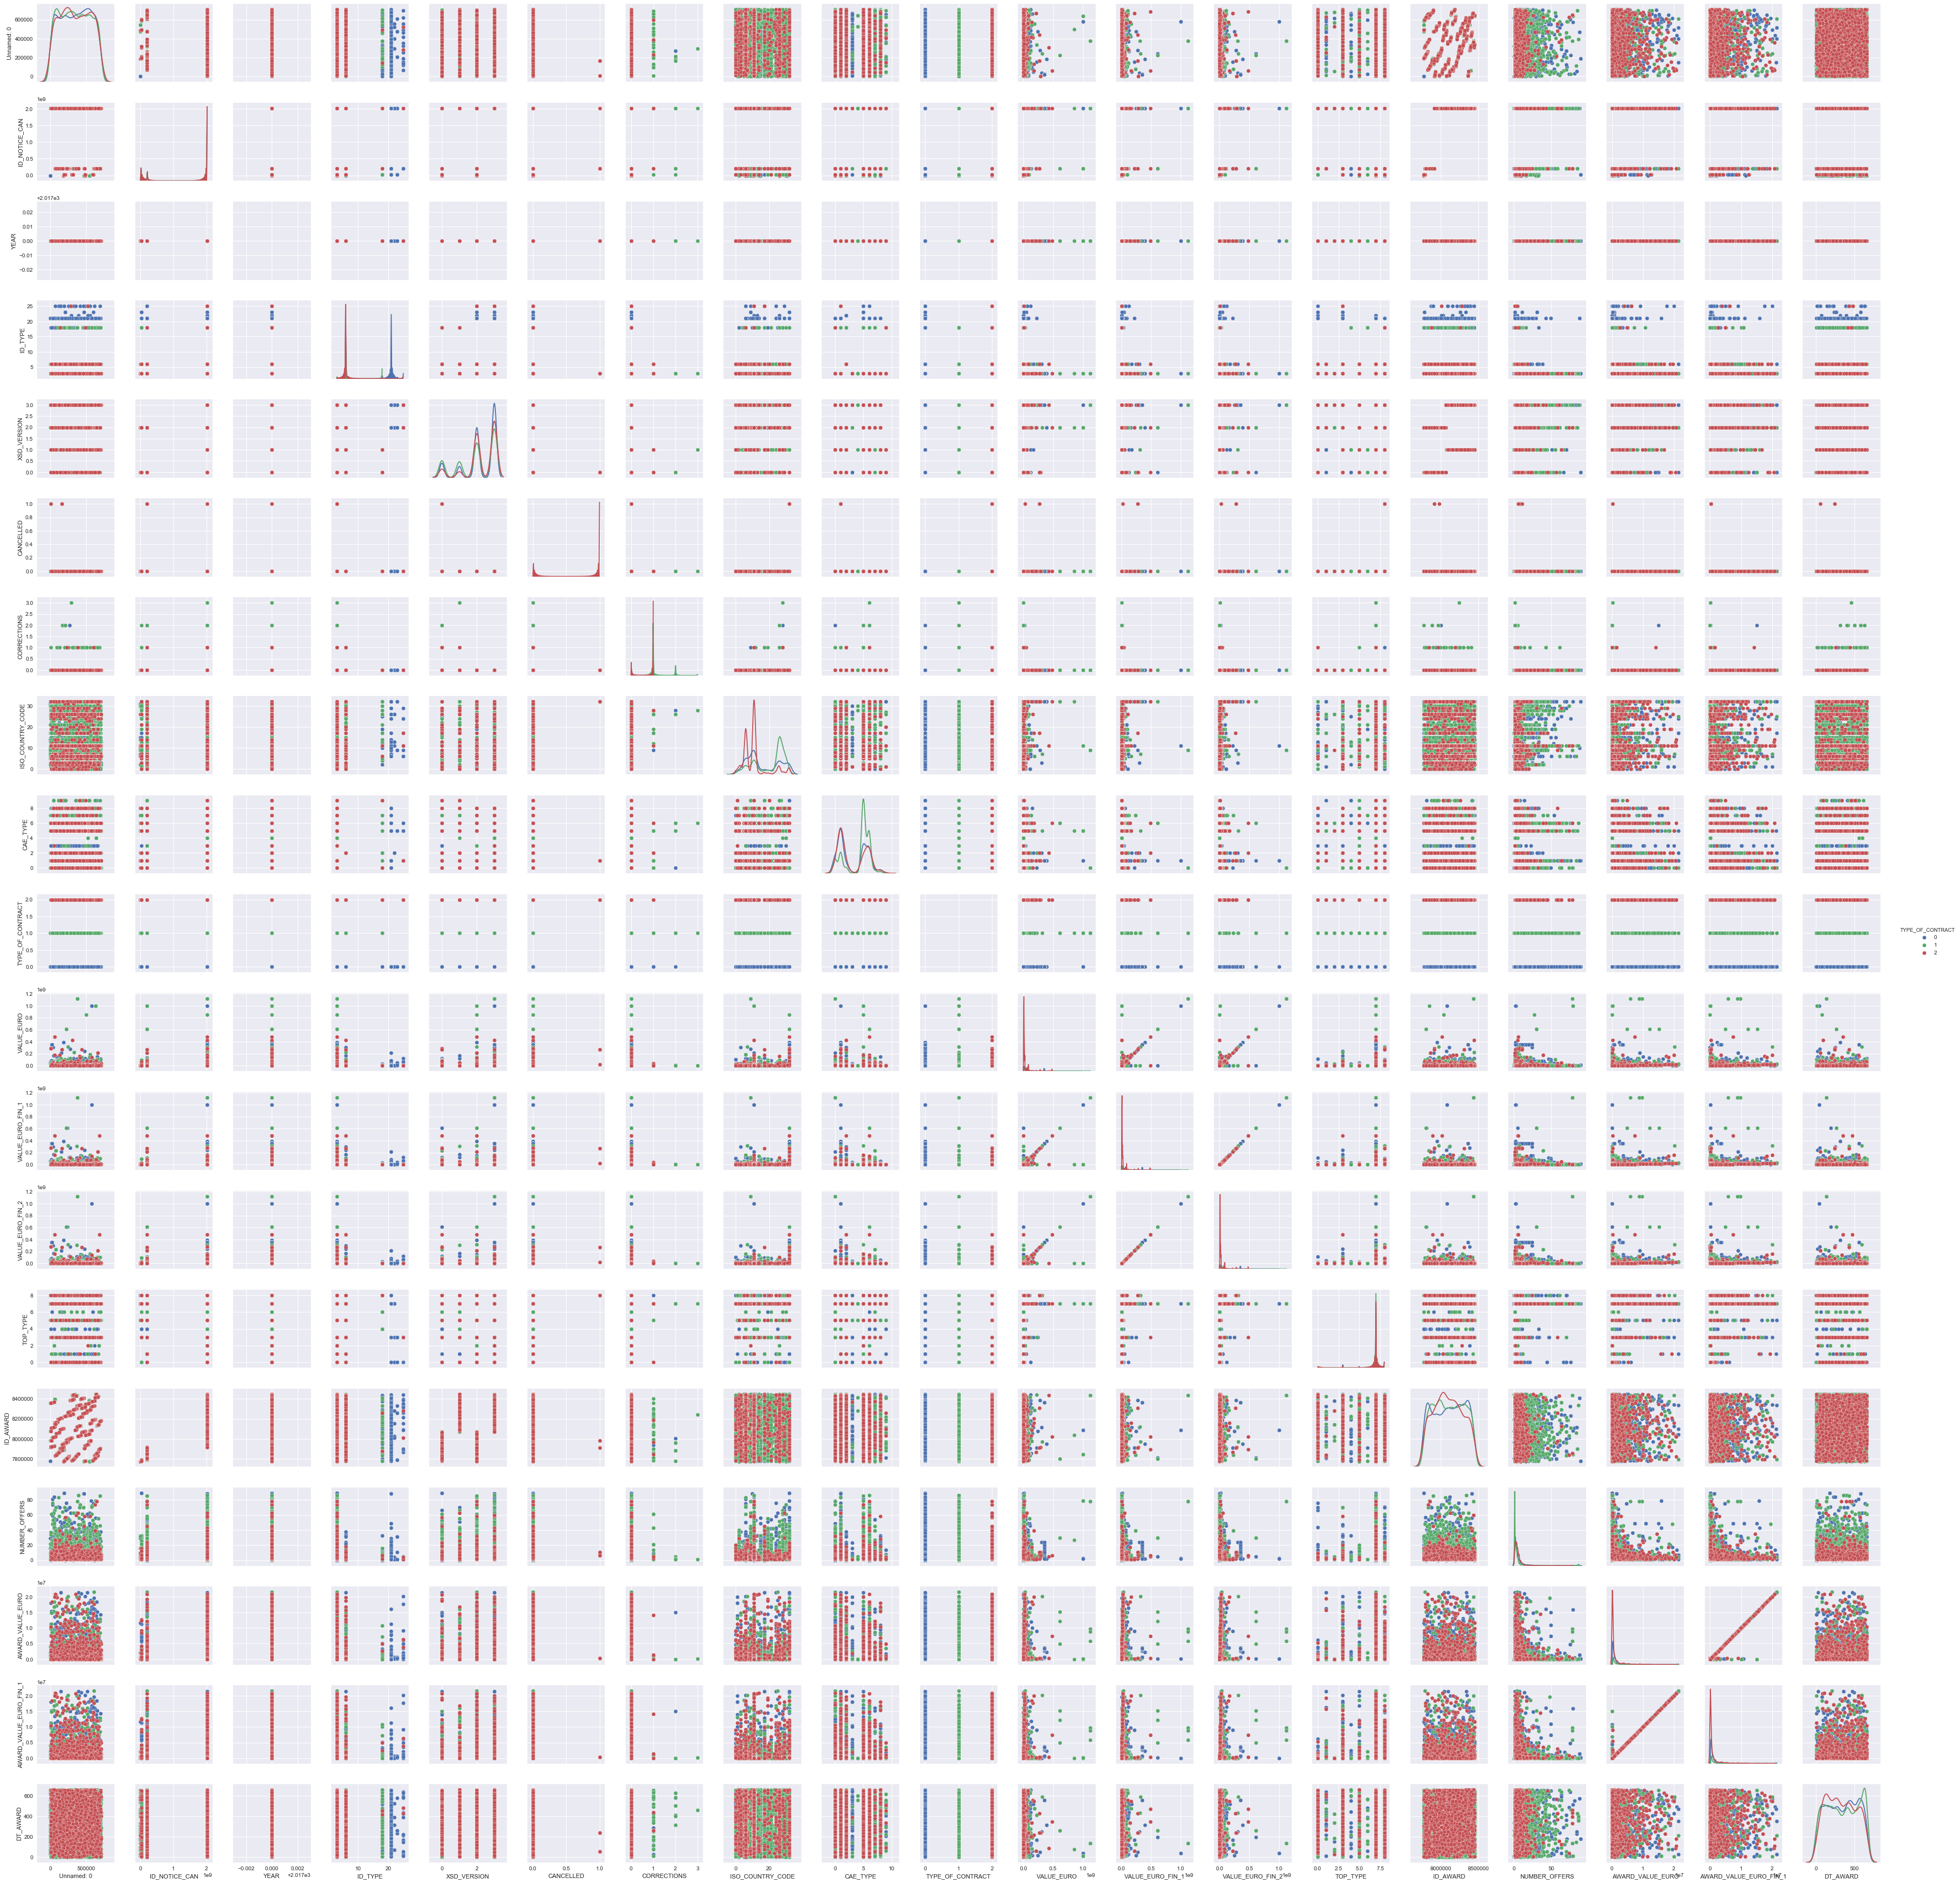

In [74]:
sns.pairplot(df_model, hue='TYPE_OF_CONTRACT', diag_kind='kde')

<h4>Setting labels</h4>

In [75]:
cols = df_model.columns.tolist()
cols = cols[9:] + cols[:8]
df_model = df_model[cols]

In [76]:
df_model.rename(columns = {'TYPE_OF_CONTRACT' : 'y'}, inplace = True)
df_model.head()

/Users/Pablo/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3780: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,y,VALUE_EURO,VALUE_EURO_FIN_1,VALUE_EURO_FIN_2,TOP_TYPE,ID_AWARD,NUMBER_OFFERS,AWARD_VALUE_EURO,AWARD_VALUE_EURO_FIN_1,DT_AWARD,Unnamed: 0,ID_NOTICE_CAN,YEAR,ID_TYPE,XSD_VERSION,CANCELLED,CORRECTIONS,ISO_COUNTRY_CODE
0,0,2.578550e+05,2.578550e+05,2.578550e+05,3,7903596.0,3.0,257855.00,257855.00,586,701785,201788281,2017,3,2,0,0,11
1,0,3.501367e+08,3.501367e+08,3.501367e+08,7,8361630.0,17.0,3331759.16,3331759.16,560,18948,2017462007,2017,3,3,0,0,32
2,1,3.513013e+05,3.513013e+05,3.513013e+05,7,8370274.0,6.0,4489.58,4489.58,210,571268,2017469616,2017,3,1,0,0,28
3,1,1.000000e+00,1.000000e+00,1.000000e+00,7,8433233.0,1.0,1.00,1.00,98,372379,2017518456,2017,3,3,0,0,11
5,1,8.377988e+04,1.082829e+05,1.082829e+05,7,7893542.0,1.0,617.67,617.67,633,680705,201779390,2017,3,0,0,0,26


<h4>Shuffling the dataset</h4>

In [77]:
df_model = df_model.sample(frac=1).reset_index(drop=True)

In [78]:
df_model.head()

,y,VALUE_EURO,VALUE_EURO_FIN_1,VALUE_EURO_FIN_2,TOP_TYPE,ID_AWARD,NUMBER_OFFERS,AWARD_VALUE_EURO,AWARD_VALUE_EURO_FIN_1,DT_AWARD,Unnamed: 0,ID_NOTICE_CAN,YEAR,ID_TYPE,XSD_VERSION,CANCELLED,CORRECTIONS,ISO_COUNTRY_CODE
0,1,1259924.52,1263538.40,1263538.40,7,8133489.0,3.0,161.26,161.26,402,422816,2017280972,2017,3,3,0,0,26
1,1,6700000.00,6689600.00,6689600.00,7,8039734.0,4.0,250224.00,250224.00,561,500333,2017201155,2017,3,2,0,0,11
2,1,4961138.30,4961138.30,4961138.30,7,8317636.0,2.0,22208.85,22208.85,172,486661,2017427612,2017,3,3,0,0,26
3,1,205500.00,50706.49,50706.49,7,7970016.0,3.0,387.43,387.43,652,236453,2017148752,2017,3,2,0,0,30
4,1,336399.43,336399.43,336399.43,7,7990464.0,10.0,336399.43,336399.43,392,236398,2017161709,2017,6,2,0,0,2


<h4>Splitting dataset into train and test sets</h4>

In [79]:
X = df_model.iloc[:,1:]
y = df_model.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [80]:
seed = 7

<h4>Evaluating classification algorithms' performance on dataset</h4>

In [81]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

In [82]:
results = []
names = []
scoring = 'accuracy'

In [83]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.590892 (0.009850)


/Users/Pablo/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Pablo/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/Pablo/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Pablo/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Pablo/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Pablo/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are

LDA: 0.605998 (0.006509)
KNN: 0.661853 (0.010789)
DTC: 0.711287 (0.006302)
NB: 0.581811 (0.008105)
SVM: 0.588500 (0.009896)
RF: 0.749690 (0.007193)


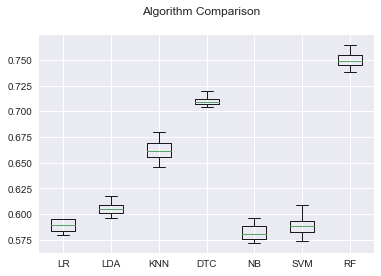

In [84]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<h4>Scaling train and test sets</h4>

In [85]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h3>Random Forest</h3>

<h4>Setting Ranfom Forest hyper-parameters search with RandomizedSearchCV</h4>

In [86]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(20, 200, 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, 10)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

<h4>Training Random Forest model</h4>

In [87]:
classifier_rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = classifier_rf, 
                               param_distributions = random_grid_rf,
                               n_iter = 100,
                               cv = 3,
                               verbose = 1,
                               random_state = 0,
                               n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.8min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

<h4>Getting predictions</h4>

In [88]:
y_pred_rf = rf_random.predict(X_test)

In [89]:
print('Accuracy on train set: {:.2f}'.format(rf_random.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(rf_random.score(X_test, y_test)))

Accuracy on train set: 1.00
Accuracy on test set: 0.78


Model is overfitting

In [174]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
confusion_matrix_rf

array([[1082,  383,   45],
       [ 355, 2212,   41],
       [ 120,   70,  208]])

In [91]:
print(classification_report(y_test, y_pred_rf))

             precision    recall  f1-score   support

          0       0.69      0.72      0.71      1510
          1       0.83      0.85      0.84      2608
          2       0.71      0.52      0.60       398

avg / total       0.77      0.78      0.77      4516



<h2>Autoencoder in Keras</h2>

<h4>Checking majority class</h4>

In [98]:
df_model.groupby('y').count()

,VALUE_EURO,VALUE_EURO_FIN_1,VALUE_EURO_FIN_2,TOP_TYPE,ID_AWARD,NUMBER_OFFERS,AWARD_VALUE_EURO,AWARD_VALUE_EURO_FIN_1,DT_AWARD,Unnamed: 0,ID_NOTICE_CAN,YEAR,ID_TYPE,XSD_VERSION,CANCELLED,CORRECTIONS,ISO_COUNTRY_CODE
y,,,,,,,,,,,,,,,,,
0,7502,7502,7502,7502,7502,7502,7502,7502,7502,7502,7502,7502,7502,7502,7502,7502,7502
1,13088,13088,13088,13088,13088,13088,13088,13088,13088,13088,13088,13088,13088,13088,13088,13088,13088
2,1986,1986,1986,1986,1986,1986,1986,1986,1986,1986,1986,1986,1986,1986,1986,1986,1986


<h4>Setting majority class as training set and dataset as test set</h4>

In [99]:
df_enc = df_model.loc[df_model['y'] == 1]
df_enc = df_enc.sample(frac=1).reset_index(drop=True)
df_enc.head()

,y,VALUE_EURO,VALUE_EURO_FIN_1,VALUE_EURO_FIN_2,TOP_TYPE,ID_AWARD,NUMBER_OFFERS,AWARD_VALUE_EURO,AWARD_VALUE_EURO_FIN_1,DT_AWARD,Unnamed: 0,ID_NOTICE_CAN,YEAR,ID_TYPE,XSD_VERSION,CANCELLED,CORRECTIONS,ISO_COUNTRY_CODE
0,1,845587.12,761587.52,761587.52,7,8031545.0,5.0,10080.00,10080.00,106,409775,2017193459,2017,3,2,0,0,11
1,1,705.51,705.51,705.51,7,7853224.0,1.0,1010.15,1010.15,633,96150,201750741,2017,3,0,0,1,28
2,1,610646.00,610646.00,610646.00,7,7835310.0,2.0,22089.00,22089.00,80,74391,201737170,2017,3,2,0,0,30
3,1,459500.00,428800.50,428800.50,7,8116672.0,6.0,91846.00,91846.00,385,50360,2017267772,2017,3,3,0,0,27
4,1,5547741.50,4467099.74,4467099.74,7,8354898.0,2.0,165474.88,165474.88,517,532414,2017456824,2017,3,3,0,0,26


In [100]:
df_enc.shape

(13088, 18)

<h4>Scaling training and test sets</h4>

In [101]:
scaler = StandardScaler()
X_train_enc = scaler.fit_transform(df_enc)
X_test_enc = scaler.transform(df_model)

<h4>Setting neural network, training it and getting predictions</h4>

In [102]:
ncol = X_train_enc.shape[1]
input_dim = Input(shape = (ncol, ))
encoding_dim = 5

encoded1 = Dense(15, activation = 'relu')(input_dim)
encoded2 = Dense(10, activation = 'relu')(encoded1)
encoded3 = Dense(encoding_dim, activation = 'relu')(encoded2)

decoded1 = Dense(10, activation = 'relu')(encoded3)
decoded2 = Dense(15, activation = 'relu')(decoded1)
decoded3 = Dense(ncol, activation = 'sigmoid')(decoded2)

autoencoder = Model(input = input_dim, output = decoded3)

autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])

autoencoder.fit(X_train_enc, 
                X_train_enc, 
                nb_epoch = 10, 
                batch_size = 100, 
                shuffle = True, 
                validation_data = (df_model, df_model))

encoder = Model(input = input_dim, output = encoded3)
encoded_input = Input(shape = (encoding_dim, ))

encoded_out = encoder.predict(X_test_enc)

/Users/Pablo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]
/Users/Pablo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 13088 samples, validate on 22576 samples
Epoch 1/10
13088/13088 [==============================] - 2s 121us/step - loss: -0.2715 - acc: 0.1665 - val_loss: 1481135894.9738 - val_acc: 0.1021
Epoch 2/10
13088/13088 [==============================] - 1s 48us/step - loss: -1.7687 - acc: 0.1667 - val_loss: 1465456325.6924 - val_acc: 0.1382
Epoch 3/10
13088/13088 [==============================] - 1s 48us/step - loss: -2.2991 - acc: 0.1667 - val_loss: 1466056045.1538 - val_acc: 0.1383
Epoch 4/10
13088/13088 [==============================] - 1s 52us/step - loss: -2.5023 - acc: 0.1667 - val_loss: 1469717113.2644 - val_acc: 0.1391
Epoch 5/10
13088/13088 [==============================] - 1s 53us/step - loss: -2.6347 - acc: 0.1667 - val_loss: 1469549799.8469 - val_acc: 0.1399
Epoch 6/10
13088/13088 [==============================] - 1s 49us/step - loss: -2.7092 - acc: 0.1667 - val_loss: 1469856528.8505 - val_acc: 0.1398
Epoch 7/10
13088/13088 [==============================] - 1s 49us/s

/Users/Pablo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [103]:
autoencoder.evaluate(df_model, df_model)

22576/22576 [==============================] - 1s 37us/step


[-1437939686.4181433, 0.13844840657322394]